In [1]:
#Important Link 

#https://www.statsmodels.org/dev/examples/notebooks/generated/regression_plots.html?msclkid=63ff5699b2a611ec84191a25597203ca

In [2]:
import os as os

In [3]:
#os.chdir("C:\\Users\\kunal\\Desktop\\Linear_Regression_Python")
os.chdir("C:\\Users\\Ankita\\Desktop\\imarticus\\Linear Regression_Property-Price")

In [4]:
os.getcwd()

'C:\\Users\\Ankita\\Desktop\\imarticus\\Linear Regression_Property-Price'

In [5]:
os.listdir()

['Linear_Regression_Property Price Prediction _April_2022-Copy2.ipynb',
 'Property_Price_Test.csv',
 'Property_Price_Train.csv']

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

ModuleNotFoundError: No module named 'statsmodels'

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
train=pd.read_csv("Property_Price_Train.csv");train.shape

(1459, 81)

In [9]:
pred=pd.read_csv("Property_Price_Test.csv");pred.shape

(1459, 80)

In [10]:
# Remove Id and Sale_Price column from the train dataset
train = train.drop(['Id','Year_Sold','Month_Sold','Garage_Built_Year','BsmtFinSF2','BsmtUnfSF','Total_Basement_Area' ,'Garage_Area','Lot_Extent'], axis=1)

# Remove Id and Sale_Price column from the test dataset
pred = pred.drop(['Id','Year_Sold','Month_Sold','Garage_Built_Year','BsmtFinSF2','BsmtUnfSF','Total_Basement_Area', 'Garage_Area','Lot_Extent'], axis=1)

In [11]:
train.head()

Building_Class Zoning_Class  Lot_Size Road_Type Lane_Type Property_Shape  \
0              60          RLD      8450     Paved       NaN            Reg   
1              20          RLD      9600     Paved       NaN            Reg   
2              60          RLD     11250     Paved       NaN            IR1   
3              70          RLD      9550     Paved       NaN            IR1   
4              60          RLD     14260     Paved       NaN            IR1   

  Land_Outline Utility_Type Lot_Configuration Property_Slope  ...  \
0          Lvl       AllPub                 I             GS  ...   
1          Lvl       AllPub              FR2P             GS  ...   
2          Lvl       AllPub                 I             GS  ...   
3          Lvl       AllPub                 C             GS  ...   
4          Lvl       AllPub              FR2P             GS  ...   

  Three_Season_Lobby_Area Screen_Lobby_Area Pool_Area Pool_Quality  \
0                       0                 0         0          NaN   
1                       0                 0         0          NaN   
2                       0                 0         0          NaN   
3                       0                 0         0          NaN   
4                       0                 0         0          NaN   

  Fence_Quality  Miscellaneous_Feature  Miscellaneous_Value  Sale_Type  \
0           NaN                    NaN                    0         WD   
1           NaN                    NaN                    0         WD   
2           NaN                    NaN                    0         WD   
3           NaN                    NaN                    0         WD   
4           NaN                    NaN                    0         WD   

   Sale_Condition Sale_Price  
0          Normal     208500  
1          Normal     181500  
2          Normal     223500  
3         Abnorml     140000  
4          Normal     250000  

[5 rows x 72 columns]

In [12]:
pred.head(10)

Building_Class Zoning_Class      Lot_Size Road_Type Lane_Type  \
0              20          RHD  16104.819760     Paved       NaN   
1              20          RLD  15639.150810     Paved       NaN   
2              60          RLD   3849.428920     Paved       NaN   
3              60          RLD   4955.447942     Paved       NaN   
4             120          RLD   3046.604942     Paved       NaN   
5              60          RLD  10194.721200     Paved       NaN   
6              20          RLD  15033.338140     Paved       NaN   
7              60          RLD  12975.123110     Paved       NaN   
8              20          RLD  22272.588650     Paved       NaN   
9              20          RLD  11464.167120     Paved       NaN   

  Property_Shape Land_Outline Utility_Type Lot_Configuration Property_Slope  \
0            Reg          Lvl       AllPub                 I             GS   
1            IR1          Lvl       AllPub                 C             GS   
2            IR1          Lvl       AllPub                 I             GS   
3            IR1          Lvl       AllPub                 I             GS   
4            IR1          HLS       AllPub                 I             GS   
5            IR1          Lvl       AllPub                 C             GS   
6            IR1          Lvl       AllPub                 I             GS   
7            IR1          Lvl       AllPub                 I             GS   
8            Reg          Lvl       AllPub                 I             GS   
9            Reg          Lvl       AllPub                 C             GS   

   ... Enclosed_Lobby_Area Three_Season_Lobby_Area Screen_Lobby_Area  \
0  ...                   0                       0               120   
1  ...                   0                       0                 0   
2  ...                   0                       0                 0   
3  ...                   0                       0                 0   
4  ...                   0                       0               144   
5  ...                   0                       0                 0   
6  ...                   0                       0                 0   
7  ...                   0                       0                 0   
8  ...                   0                       0                 0   
9  ...                   0                       0                 0   

  Pool_Area Pool_Quality  Fence_Quality  Miscellaneous_Feature  \
0         0          NaN          MnPrv                    NaN   
1         0          NaN            NaN                   Gar2   
2         0          NaN          MnPrv                    NaN   
3         0          NaN            NaN                    NaN   
4         0          NaN            NaN                    NaN   
5         0          NaN            NaN                    NaN   
6         0          NaN          GdPrv                   Shed   
7         0          NaN            NaN                    NaN   
8         0          NaN            NaN                    NaN   
9         0          NaN          MnPrv                    NaN   

   Miscellaneous_Value  Sale_Type Sale_Condition  
0                    0         WD         Normal  
1                12500         WD         Normal  
2                    0         WD         Normal  
3                    0         WD         Normal  
4                    0         WD         Normal  
5                    0         WD         Normal  
6                  500         WD         Normal  
7                    0         WD         Normal  
8                    0         WD         Normal  
9                    0         WD         Normal  

[10 rows x 71 columns]

In [13]:
alldata = train.append(pred);alldata.shape

(2918, 72)

# Checking datatypes

In [14]:
# check the datatype of variables
alldata.dtypes

Building_Class             int64
Zoning_Class              object
Lot_Size                 float64
Road_Type                 object
Lane_Type                 object
                          ...   
Miscellaneous_Feature     object
Miscellaneous_Value        int64
Sale_Type                 object
Sale_Condition            object
Sale_Price               float64
Length: 72, dtype: object

In [15]:
#Changing the datatype of building class

alldata['Building_Class']=alldata['Building_Class'].astype('object')
alldata['Overall_Material']=alldata['Overall_Material'].astype('object')
alldata['House_Condition']=alldata['House_Condition'].astype('object')


# Missing Values

In [16]:
#!pip install missingno

import missingno as msno

In [17]:
?msno.matrix

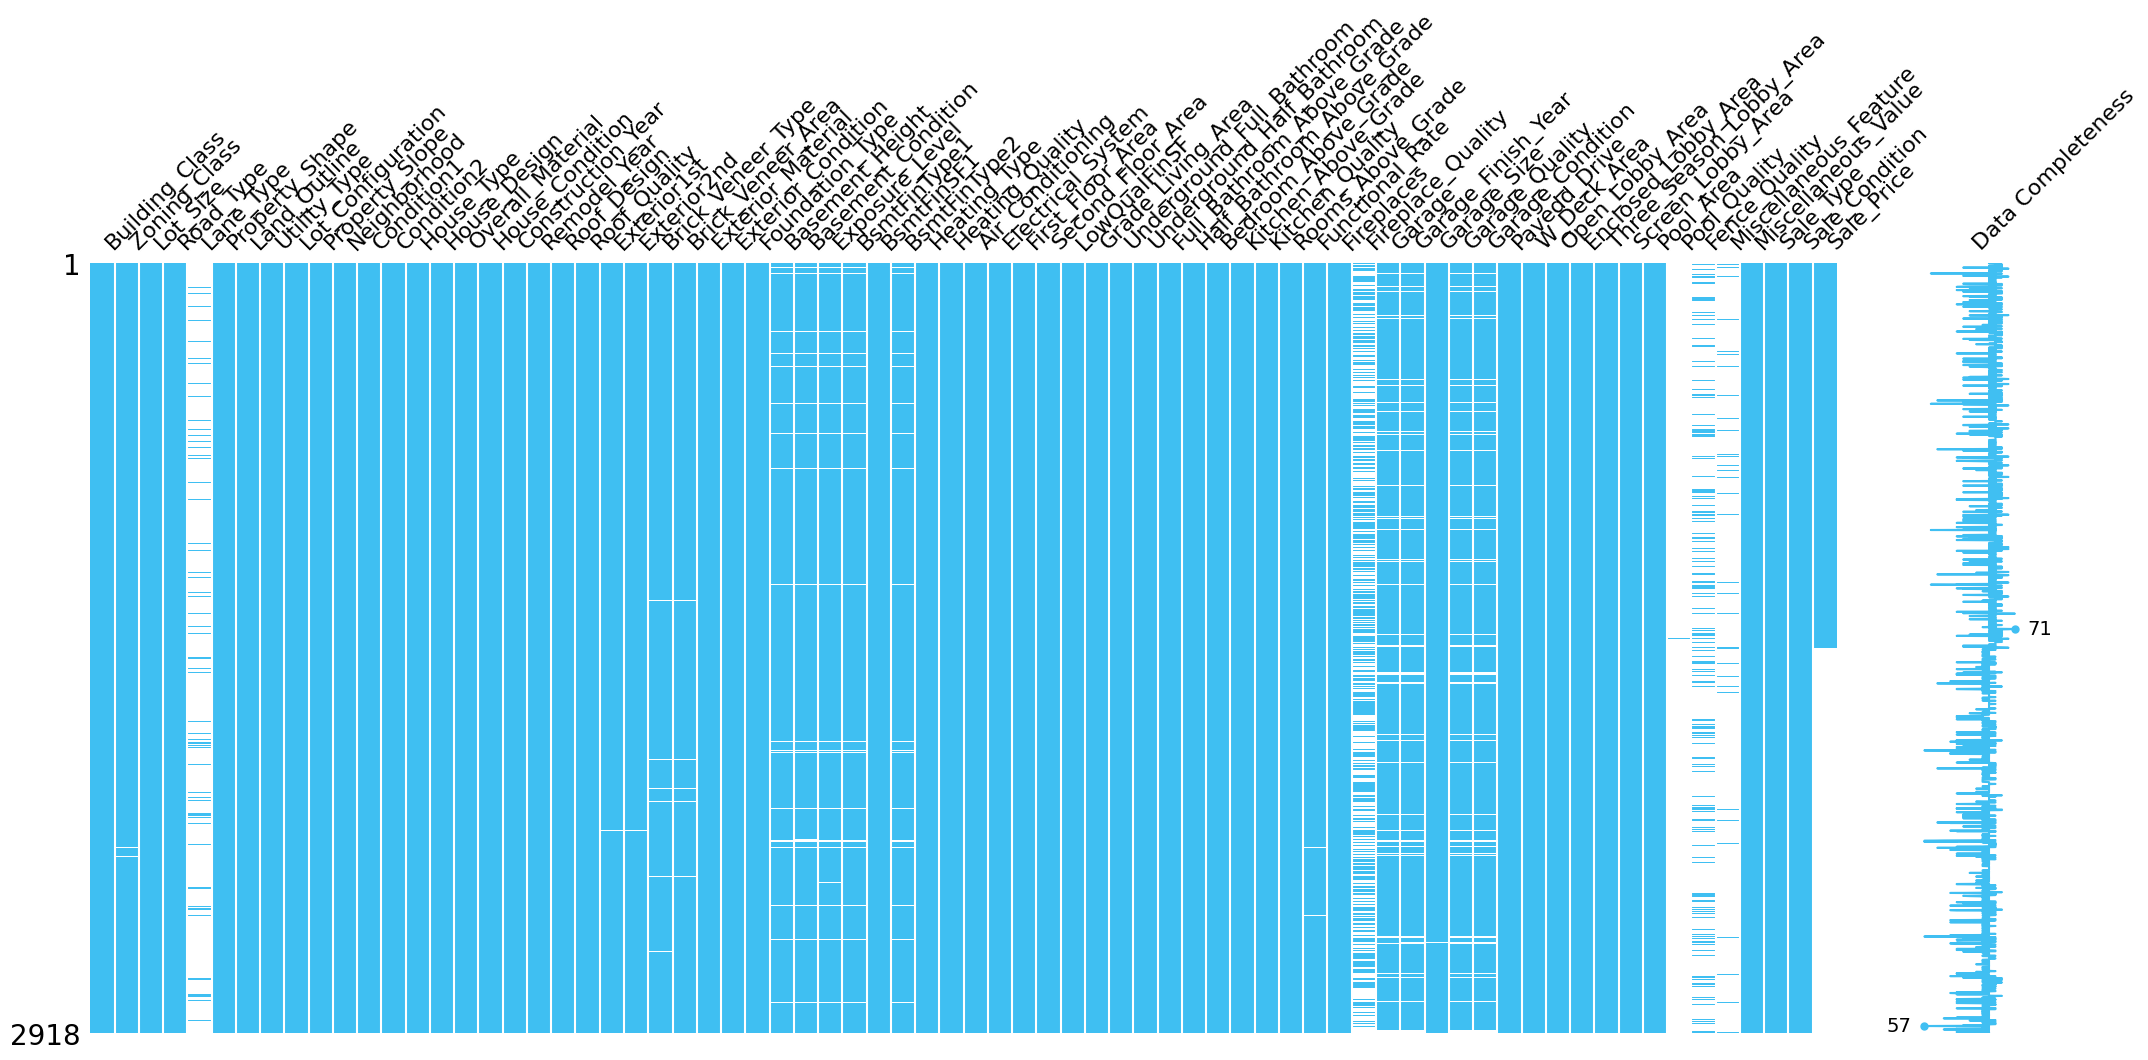

In [18]:
msno.matrix(alldata,labels=True,color=(0.25,0.75,.95));plt.show()

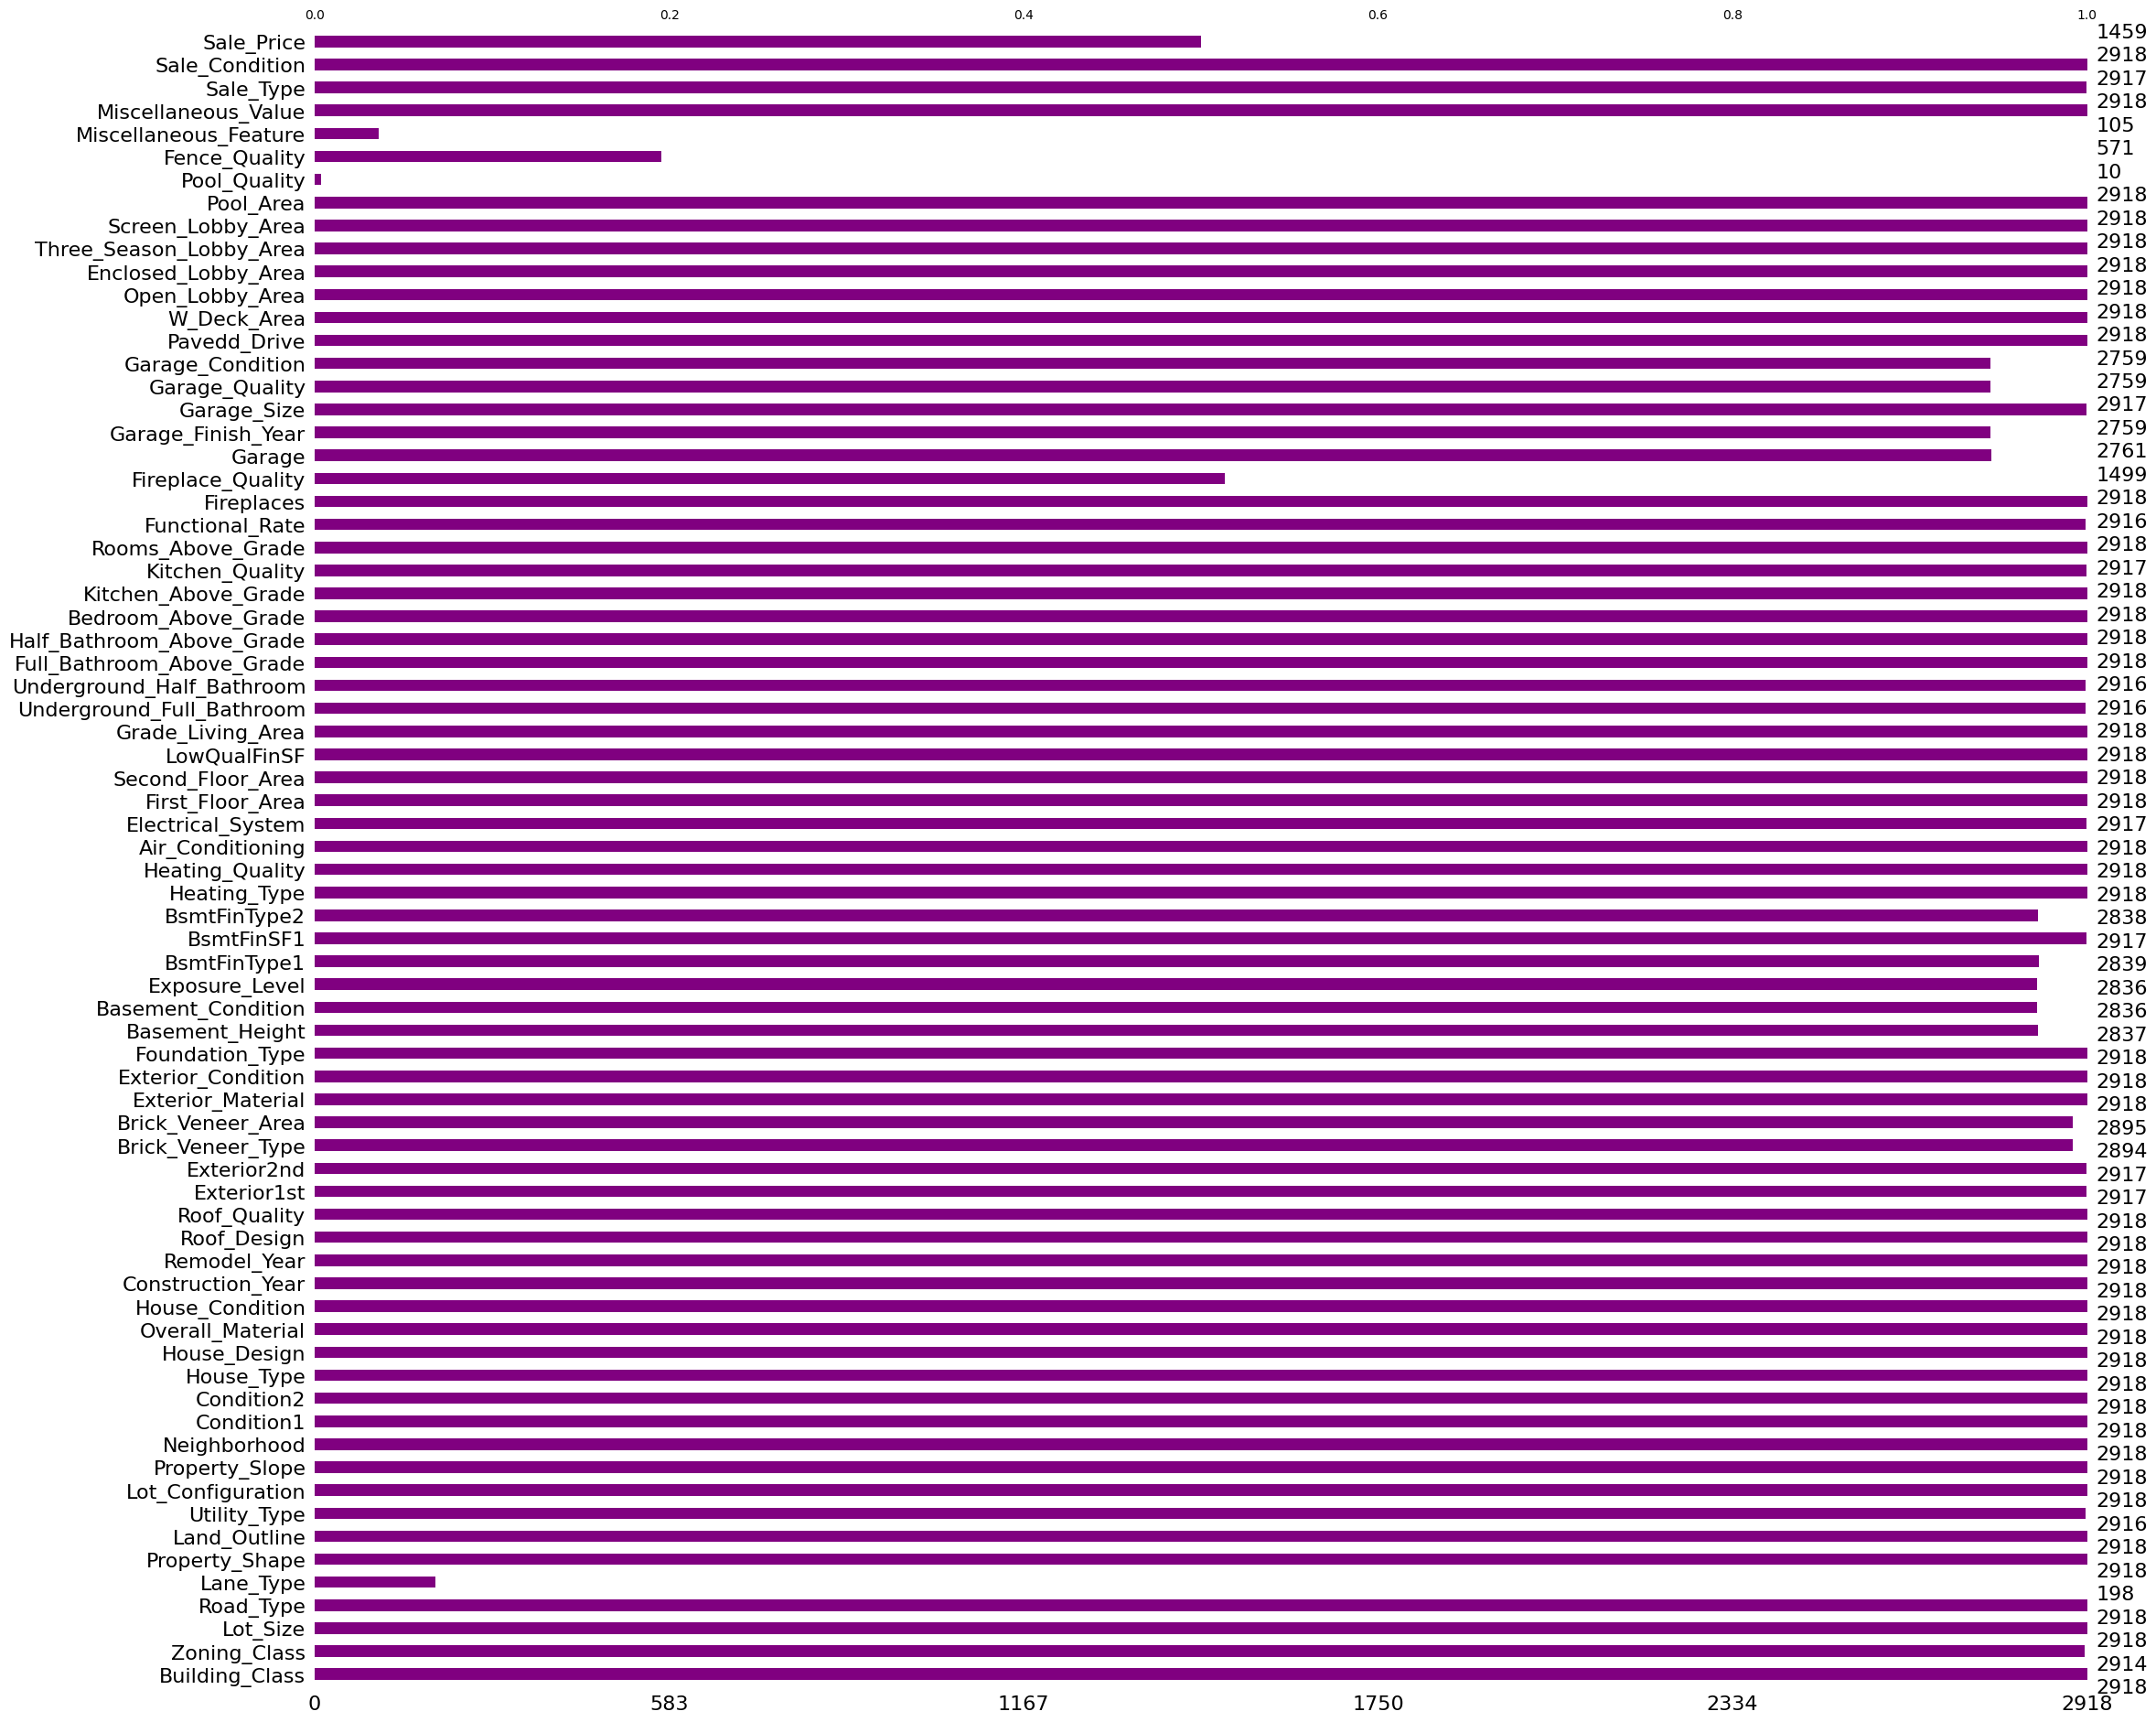

In [19]:
msno.bar(alldata,color="purple");plt.show()

In [20]:
#count ofmissing values in each column

alldata.isnull().sum()

Building_Class              0
Zoning_Class                4
Lot_Size                    0
Road_Type                   0
Lane_Type                2720
                         ... 
Miscellaneous_Feature    2813
Miscellaneous_Value         0
Sale_Type                   1
Sale_Condition              0
Sale_Price               1459
Length: 72, dtype: int64

In [21]:
alldata.drop(['Pool_Quality','Fence_Quality','Miscellaneous_Feature','Fireplace_Quality'],axis=1,inplace=True)

# Examine the numerical and categorical features in the dataset

In [22]:
df_numeric_features = alldata.select_dtypes(include=np.number)

df_numeric_features.head()

Lot_Size  Construction_Year  Remodel_Year  Brick_Veneer_Area  BsmtFinSF1  \
0    8450.0               2003          2003              196.0       706.0   
1    9600.0               1976          1976                0.0       978.0   
2   11250.0               2001          2002              162.0       486.0   
3    9550.0               1915          1970                0.0       216.0   
4   14260.0               2000          2000              350.0       655.0   

   First_Floor_Area  Second_Floor_Area  LowQualFinSF  Grade_Living_Area  \
0               856                854             0               1710   
1              1262                  0             0               1262   
2               920                866             0               1786   
3               961                756             0               1717   
4              1145               1053             0               2198   

   Underground_Full_Bathroom  ...  Fireplaces  Garage_Size  W_Deck_Area  \
0                        1.0  ...           0          2.0   163.788080   
1                        0.0  ...           1          2.0   198.900074   
2                        1.0  ...           1          2.0    26.127533   
3                        1.0  ...           1          3.0    46.948018   
4                        1.0  ...           1          3.0   -10.626105   

   Open_Lobby_Area  Enclosed_Lobby_Area  Three_Season_Lobby_Area  \
0        69.596115            20.337934                        0   
1        74.716033            15.039392                        0   
2        32.085268           -46.232198                        0   
3        40.181415            60.921821                        0   
4        20.755323            21.788818                        0   

   Screen_Lobby_Area  Pool_Area  Miscellaneous_Value  Sale_Price  
0                  0          0                    0    208500.0  
1                  0          0                    0    181500.0  
2                  0          0                    0    223500.0  
3                  0          0                    0    140000.0  
4                  0          0                    0    250000.0  

[5 rows x 26 columns]

In [23]:
df_categorical_features = alldata.select_dtypes(include='object')

df_categorical_features.head()

Building_Class Zoning_Class Road_Type Lane_Type Property_Shape Land_Outline  \
0             60          RLD     Paved       NaN            Reg          Lvl   
1             20          RLD     Paved       NaN            Reg          Lvl   
2             60          RLD     Paved       NaN            IR1          Lvl   
3             70          RLD     Paved       NaN            IR1          Lvl   
4             60          RLD     Paved       NaN            IR1          Lvl   

  Utility_Type Lot_Configuration Property_Slope Neighborhood  ...  \
0       AllPub                 I             GS      CollgCr  ...   
1       AllPub              FR2P             GS      Veenker  ...   
2       AllPub                 I             GS      CollgCr  ...   
3       AllPub                 C             GS      Crawfor  ...   
4       AllPub              FR2P             GS      NoRidge  ...   

  Electrical_System Kitchen_Quality Functional_Rate  Garage  \
0             SBrkr              Gd              TF  Attchd   
1             SBrkr              TA              TF  Attchd   
2             SBrkr              Gd              TF  Attchd   
3             SBrkr              Gd              TF  Detchd   
4             SBrkr              Gd              TF  Attchd   

  Garage_Finish_Year Garage_Quality Garage_Condition Pavedd_Drive Sale_Type  \
0                RFn             TA               TA            Y        WD   
1                RFn             TA               TA            Y        WD   
2                RFn             TA               TA            Y        WD   
3                Unf             TA               TA            Y        WD   
4                RFn             TA               TA            Y        WD   

  Sale_Condition  
0         Normal  
1         Normal  
2         Normal  
3        Abnorml  
4         Normal  

[5 rows x 42 columns]

# Missing value treatment for numeric variables

In [24]:
#Missing value treatment for numerical features

df_numeric_features=df_numeric_features.fillna(df_numeric_features.median())



In [25]:
df_numeric_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2918 entries, 0 to 1458
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Lot_Size                   2918 non-null   float64
 1   Construction_Year          2918 non-null   int64  
 2   Remodel_Year               2918 non-null   int64  
 3   Brick_Veneer_Area          2918 non-null   float64
 4   BsmtFinSF1                 2918 non-null   float64
 5   First_Floor_Area           2918 non-null   int64  
 6   Second_Floor_Area          2918 non-null   int64  
 7   LowQualFinSF               2918 non-null   int64  
 8   Grade_Living_Area          2918 non-null   int64  
 9   Underground_Full_Bathroom  2918 non-null   float64
 10  Underground_Half_Bathroom  2918 non-null   float64
 11  Full_Bathroom_Above_Grade  2918 non-null   int64  
 12  Half_Bathroom_Above_Grade  2918 non-null   int64  
 13  Bedroom_Above_Grade        2918 non-null   int64

# Missing value treatment of categorical features

In [26]:
df_categorical_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2918 entries, 0 to 1458
Data columns (total 42 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Building_Class      2918 non-null   object
 1   Zoning_Class        2914 non-null   object
 2   Road_Type           2918 non-null   object
 3   Lane_Type           198 non-null    object
 4   Property_Shape      2918 non-null   object
 5   Land_Outline        2918 non-null   object
 6   Utility_Type        2916 non-null   object
 7   Lot_Configuration   2918 non-null   object
 8   Property_Slope      2918 non-null   object
 9   Neighborhood        2918 non-null   object
 10  Condition1          2918 non-null   object
 11  Condition2          2918 non-null   object
 12  House_Type          2918 non-null   object
 13  House_Design        2918 non-null   object
 14  Overall_Material    2918 non-null   object
 15  House_Condition     2918 non-null   object
 16  Roof_Design         2918

In [27]:
df_categorical_features['Lane_Type'].mode()

0    Grvl
Name: Lane_Type, dtype: object

In [28]:
df_categorical_features['Lane_Type'].mode()[0]

'Grvl'

In [29]:
df_categorical_features['Lane_Type'].fillna(df_categorical_features['Lane_Type'].mode(), inplace=True)

In [30]:
# Replace nan with None in these columns
cols_fillna = ['Lane_Type','Brick_Veneer_Type','Garage_Quality','Garage_Condition', 'Electrical_System','Garage_Finish_Year', 
               'Exposure_Level','Basement_Condition','Basement_Height','BsmtFinType1','BsmtFinType2','Garage','Zoning_Class','Functional_Rate',
               'Utility_Type','Exterior1st','Sale_Type','Exterior2nd','Kitchen_Quality','Electrical_System']


In [31]:
# Replace nan with Mode in these columns

for col in cols_fillna:
    df_categorical_features[col].fillna(df_categorical_features[col].mode()[0],inplace=True)

In [32]:
df_categorical_features.isnull().sum()

Building_Class        0
Zoning_Class          0
Road_Type             0
Lane_Type             0
Property_Shape        0
Land_Outline          0
Utility_Type          0
Lot_Configuration     0
Property_Slope        0
Neighborhood          0
Condition1            0
Condition2            0
House_Type            0
House_Design          0
Overall_Material      0
House_Condition       0
Roof_Design           0
Roof_Quality          0
Exterior1st           0
Exterior2nd           0
Brick_Veneer_Type     0
Exterior_Material     0
Exterior_Condition    0
Foundation_Type       0
Basement_Height       0
Basement_Condition    0
Exposure_Level        0
BsmtFinType1          0
BsmtFinType2          0
Heating_Type          0
Heating_Quality       0
Air_Conditioning      0
Electrical_System     0
Kitchen_Quality       0
Functional_Rate       0
Garage                0
Garage_Finish_Year    0
Garage_Quality        0
Garage_Condition      0
Pavedd_Drive          0
Sale_Type             0
Sale_Condition  

In [33]:
df_categorical_features.shape

(2918, 42)

In [34]:
df_numeric_features.shape

(2918, 26)

<AxesSubplot: >

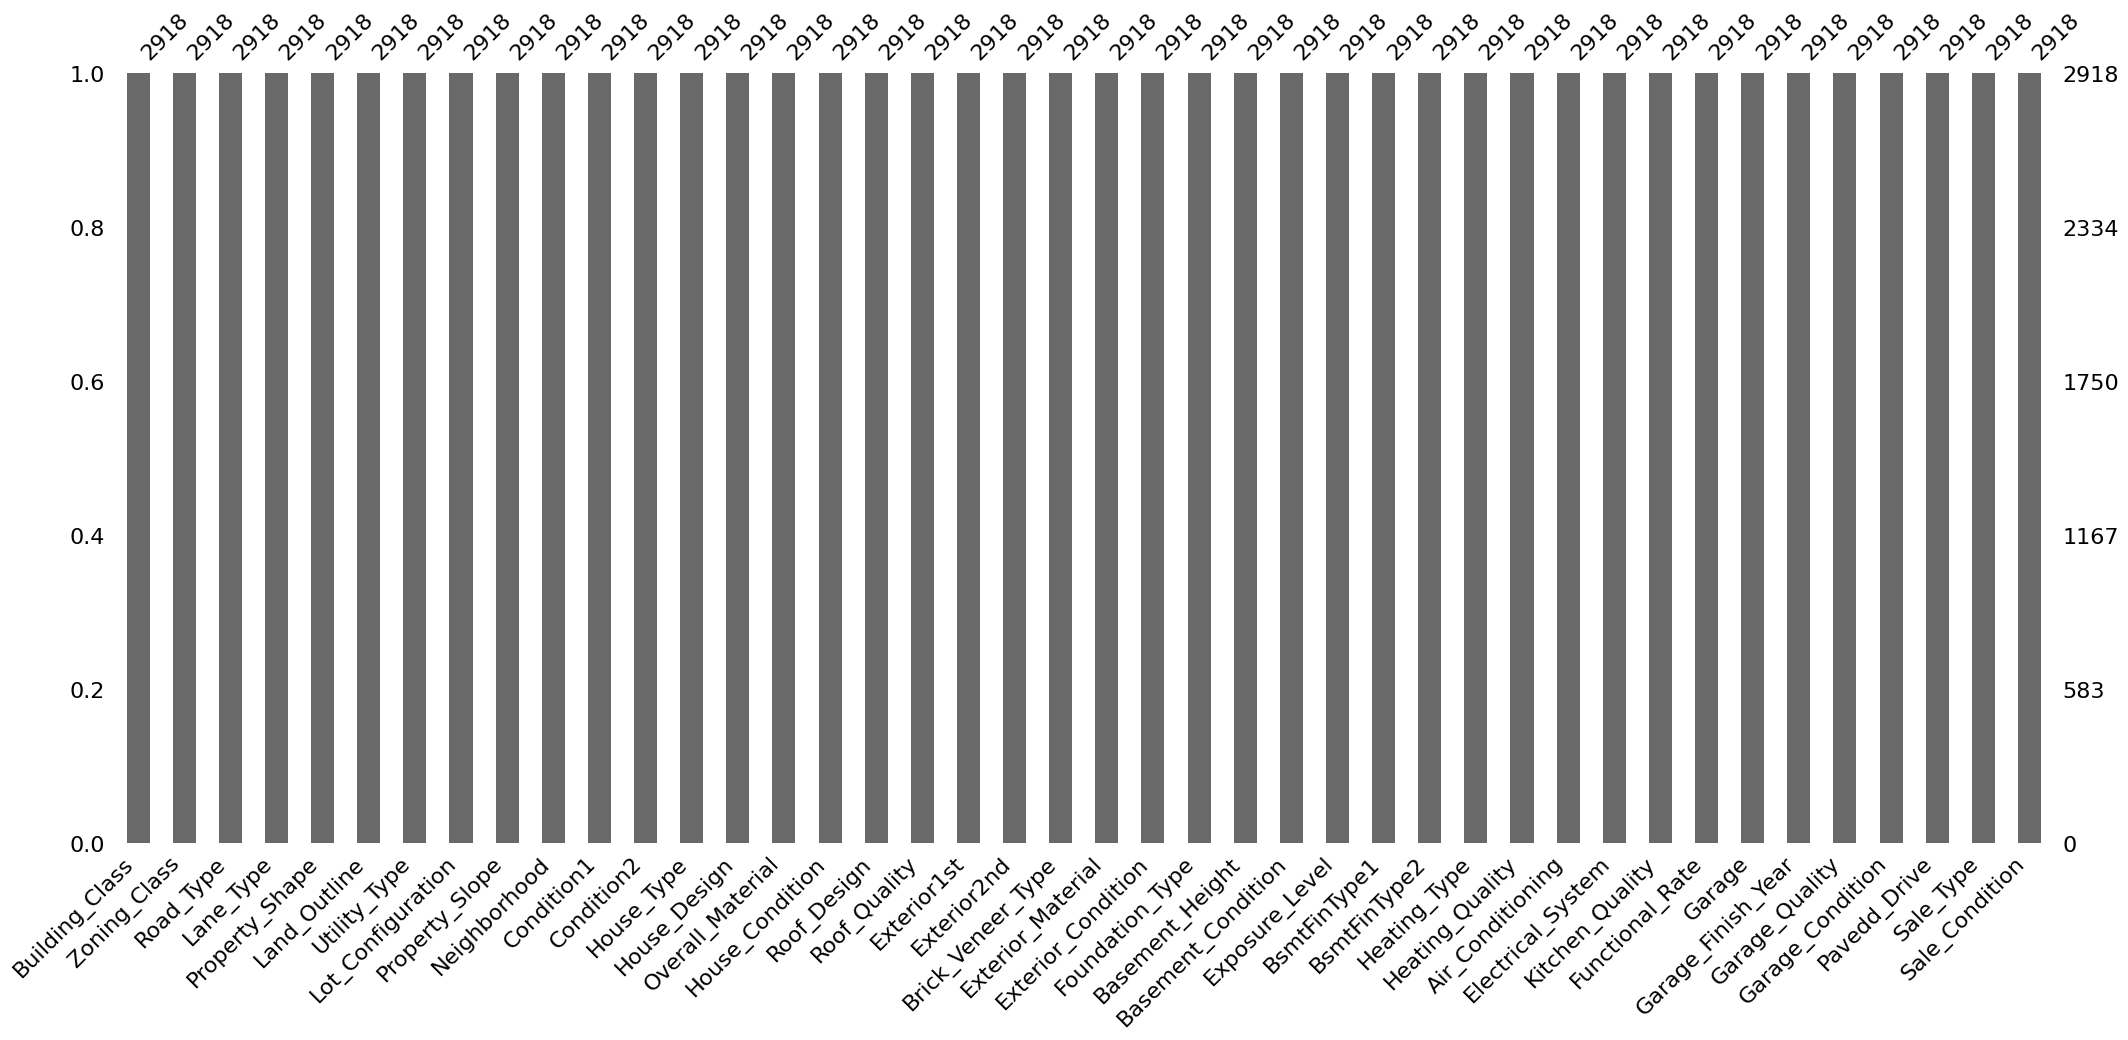

In [35]:
msno.bar(df_categorical_features)

<AxesSubplot: >

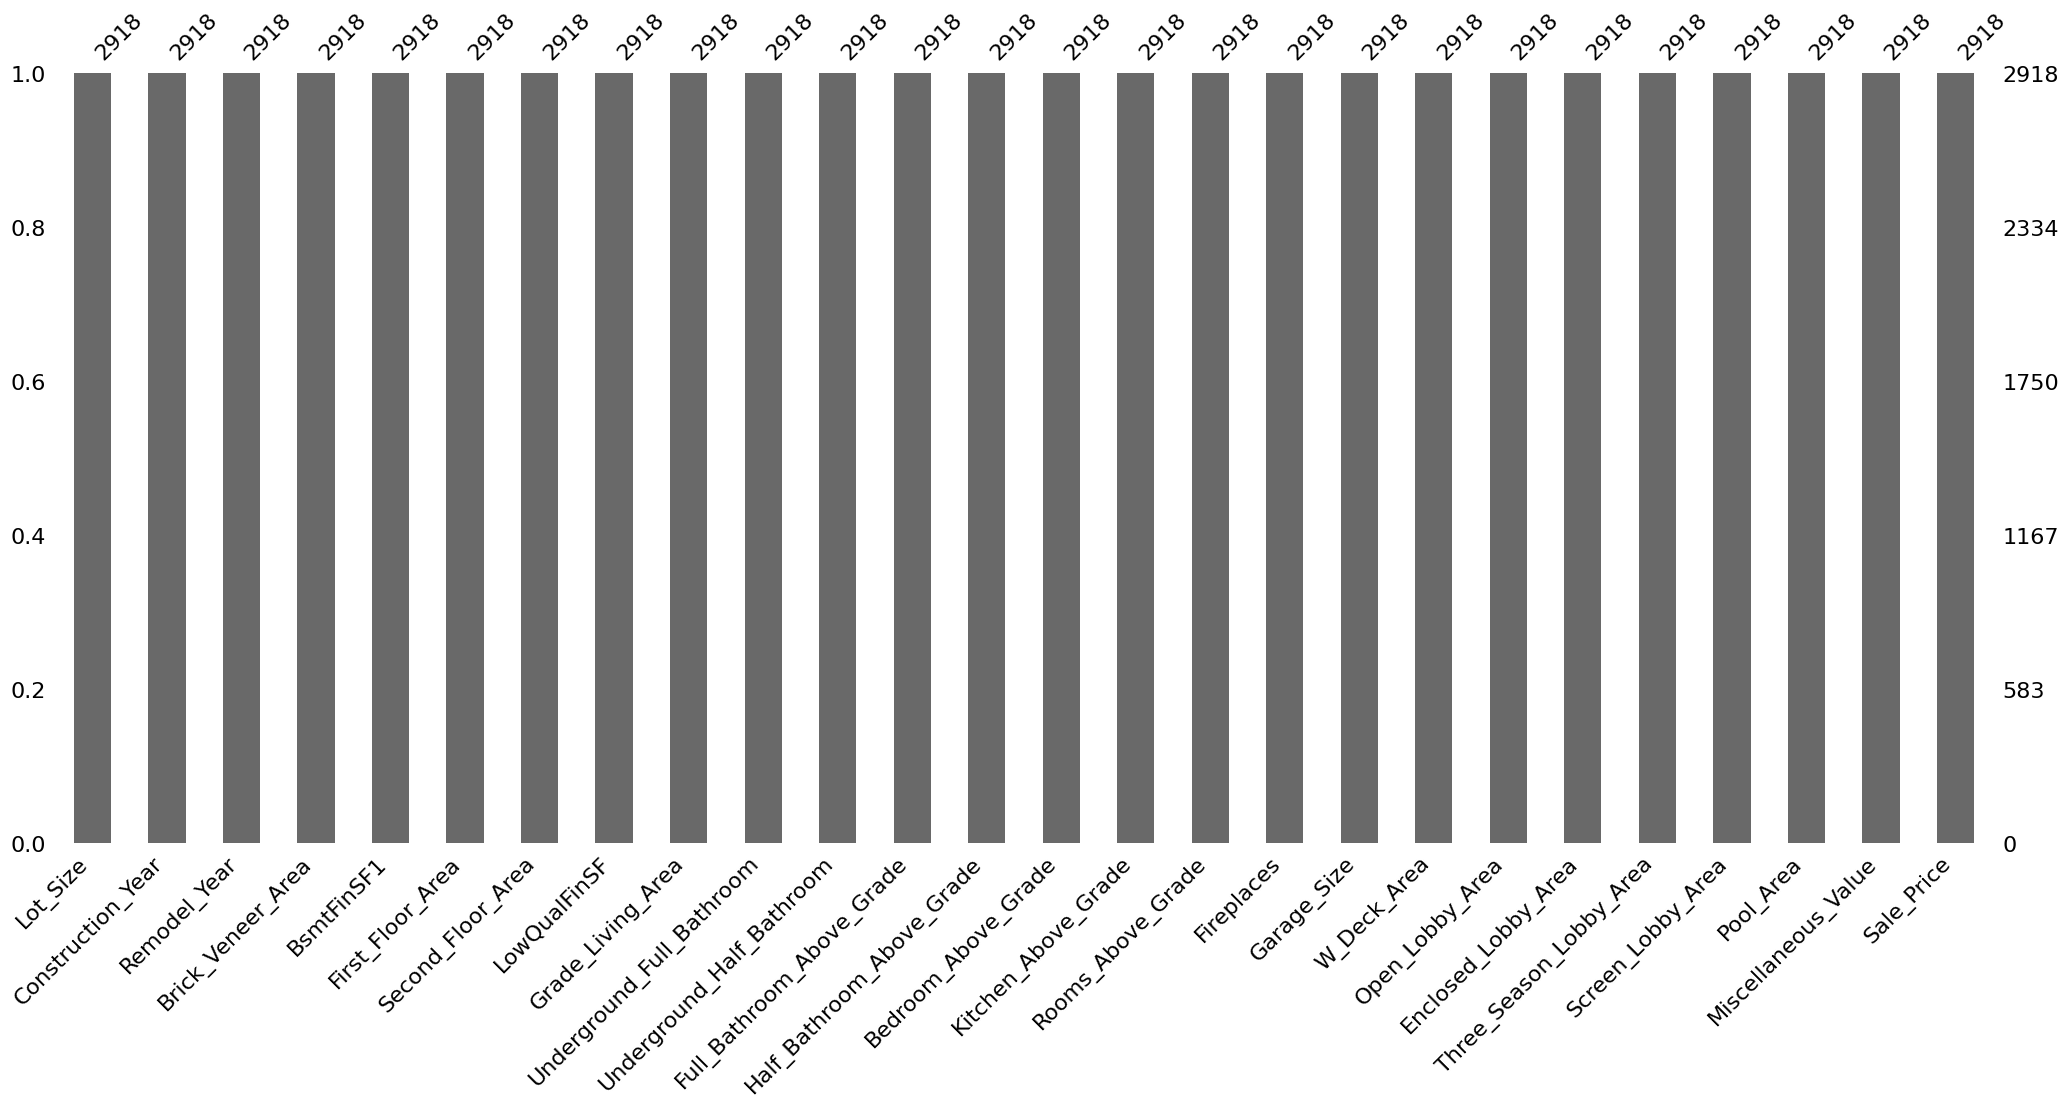

In [36]:
msno.bar(df_numeric_features)

In [37]:
all_data=pd.concat([df_numeric_features,df_categorical_features],axis=1);alldata.shape

(2918, 68)

In [38]:
#splitting the data into train and pred again

train=alldata.iloc[0:1459,:]

pred=alldata.iloc[1459:,:]

In [39]:
train.shape

(1459, 68)

In [40]:
pred.shape

(1459, 68)

In [41]:
train_cat = train.select_dtypes(include='object')#creating train_num for looping over all the numeric vars for multiple plots in one go

train_cat.head()

Building_Class Zoning_Class Road_Type Lane_Type Property_Shape Land_Outline  \
0             60          RLD     Paved       NaN            Reg          Lvl   
1             20          RLD     Paved       NaN            Reg          Lvl   
2             60          RLD     Paved       NaN            IR1          Lvl   
3             70          RLD     Paved       NaN            IR1          Lvl   
4             60          RLD     Paved       NaN            IR1          Lvl   

  Utility_Type Lot_Configuration Property_Slope Neighborhood  ...  \
0       AllPub                 I             GS      CollgCr  ...   
1       AllPub              FR2P             GS      Veenker  ...   
2       AllPub                 I             GS      CollgCr  ...   
3       AllPub                 C             GS      Crawfor  ...   
4       AllPub              FR2P             GS      NoRidge  ...   

  Electrical_System Kitchen_Quality Functional_Rate  Garage  \
0             SBrkr              Gd              TF  Attchd   
1             SBrkr              TA              TF  Attchd   
2             SBrkr              Gd              TF  Attchd   
3             SBrkr              Gd              TF  Detchd   
4             SBrkr              Gd              TF  Attchd   

  Garage_Finish_Year Garage_Quality Garage_Condition Pavedd_Drive Sale_Type  \
0                RFn             TA               TA            Y        WD   
1                RFn             TA               TA            Y        WD   
2                RFn             TA               TA            Y        WD   
3                Unf             TA               TA            Y        WD   
4                RFn             TA               TA            Y        WD   

  Sale_Condition  
0         Normal  
1         Normal  
2         Normal  
3        Abnorml  
4         Normal  

[5 rows x 42 columns]

In [42]:
train_num = train.select_dtypes(include=np.number)#creating train_catfor looping over all the categorical vars for multiple plots in one go

train_num.head()

Lot_Size  Construction_Year  Remodel_Year  Brick_Veneer_Area  BsmtFinSF1  \
0    8450.0               2003          2003              196.0       706.0   
1    9600.0               1976          1976                0.0       978.0   
2   11250.0               2001          2002              162.0       486.0   
3    9550.0               1915          1970                0.0       216.0   
4   14260.0               2000          2000              350.0       655.0   

   First_Floor_Area  Second_Floor_Area  LowQualFinSF  Grade_Living_Area  \
0               856                854             0               1710   
1              1262                  0             0               1262   
2               920                866             0               1786   
3               961                756             0               1717   
4              1145               1053             0               2198   

   Underground_Full_Bathroom  ...  Fireplaces  Garage_Size  W_Deck_Area  \
0                        1.0  ...           0          2.0   163.788080   
1                        0.0  ...           1          2.0   198.900074   
2                        1.0  ...           1          2.0    26.127533   
3                        1.0  ...           1          3.0    46.948018   
4                        1.0  ...           1          3.0   -10.626105   

   Open_Lobby_Area  Enclosed_Lobby_Area  Three_Season_Lobby_Area  \
0        69.596115            20.337934                        0   
1        74.716033            15.039392                        0   
2        32.085268           -46.232198                        0   
3        40.181415            60.921821                        0   
4        20.755323            21.788818                        0   

   Screen_Lobby_Area  Pool_Area  Miscellaneous_Value  Sale_Price  
0                  0          0                    0    208500.0  
1                  0          0                    0    181500.0  
2                  0          0                    0    223500.0  
3                  0          0                    0    140000.0  
4                  0          0                    0    250000.0  

[5 rows x 26 columns]

# Categorical Variables

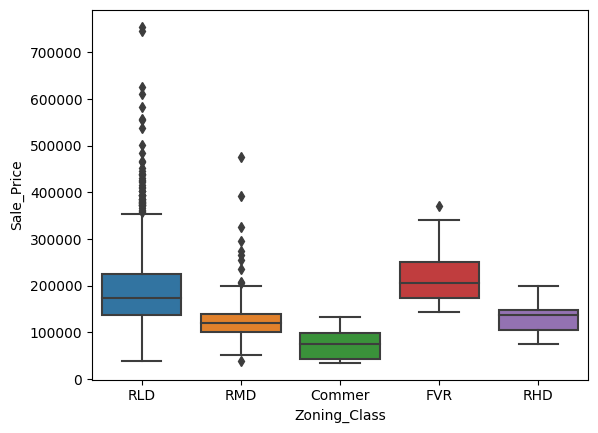

In [43]:
#Zoning Class and its impact on price of the property

sns.boxplot(y=train['Sale_Price'],x=train['Zoning_Class']);plt.show()


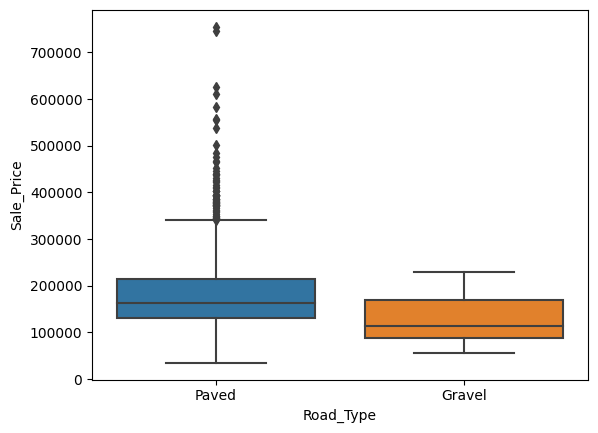

In [44]:
#Road Type and its impact on price of the property

sns.boxplot(y=train['Sale_Price'],x=train['Road_Type']);plt.show()

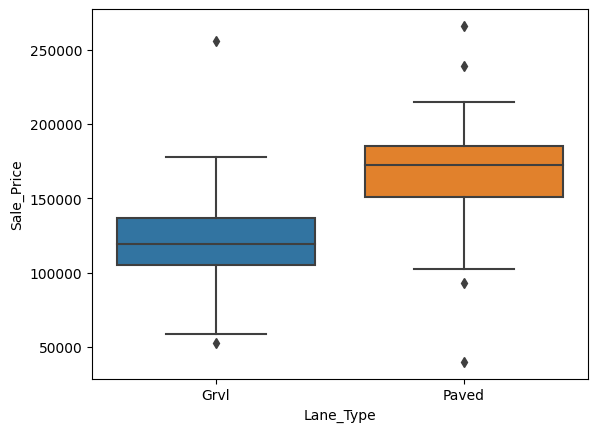

In [45]:
#Lane Type and its impact on price of the property

sns.boxplot(y=train['Sale_Price'],x=train['Lane_Type']);plt.show()

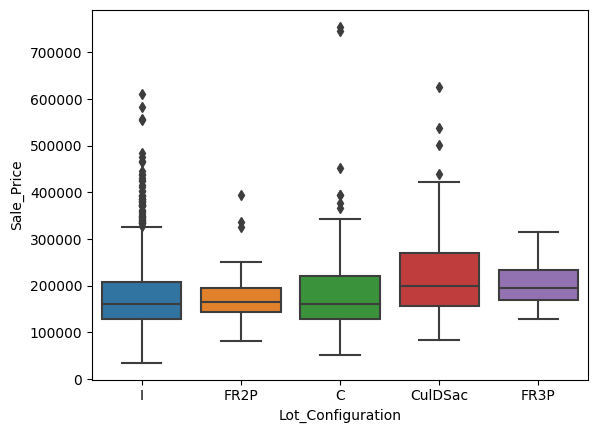

In [46]:
#Lot_Configuration

#Lot Configuration and its impact on price of the property

sns.boxplot(y=train['Sale_Price'],x=train['Lot_Configuration']);plt.show()

In [47]:
train_cat.columns

Index(['Building_Class', 'Zoning_Class', 'Road_Type', 'Lane_Type',
       'Property_Shape', 'Land_Outline', 'Utility_Type', 'Lot_Configuration',
       'Property_Slope', 'Neighborhood', 'Condition1', 'Condition2',
       'House_Type', 'House_Design', 'Overall_Material', 'House_Condition',
       'Roof_Design', 'Roof_Quality', 'Exterior1st', 'Exterior2nd',
       'Brick_Veneer_Type', 'Exterior_Material', 'Exterior_Condition',
       'Foundation_Type', 'Basement_Height', 'Basement_Condition',
       'Exposure_Level', 'BsmtFinType1', 'BsmtFinType2', 'Heating_Type',
       'Heating_Quality', 'Air_Conditioning', 'Electrical_System',
       'Kitchen_Quality', 'Functional_Rate', 'Garage', 'Garage_Finish_Year',
       'Garage_Quality', 'Garage_Condition', 'Pavedd_Drive', 'Sale_Type',
       'Sale_Condition'],
      dtype='object')

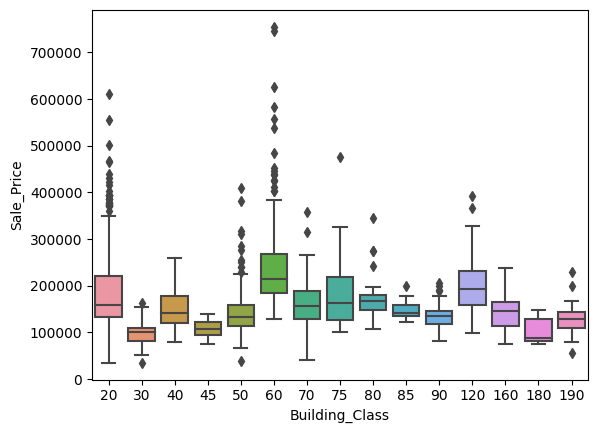

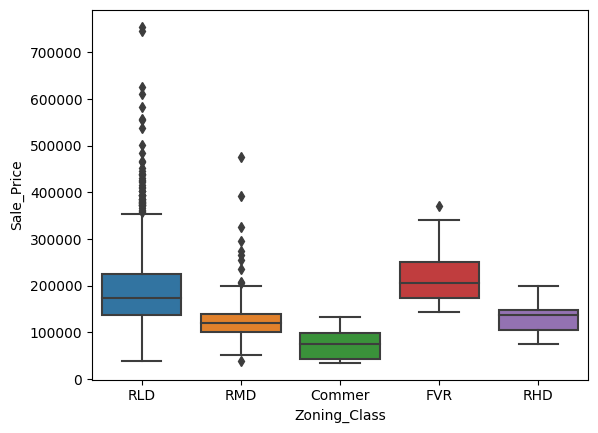

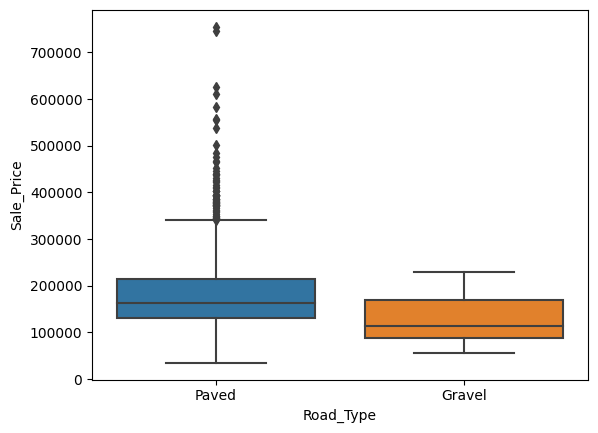

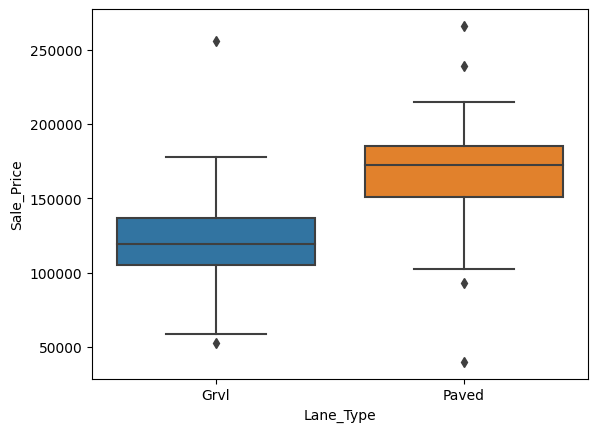

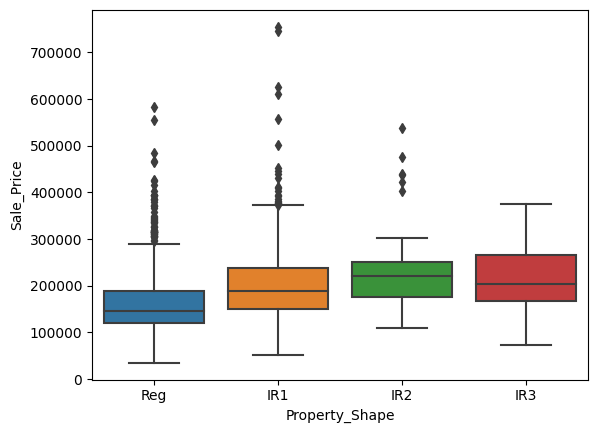

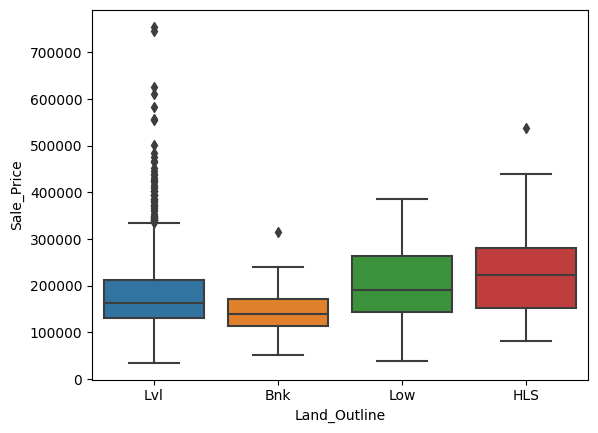

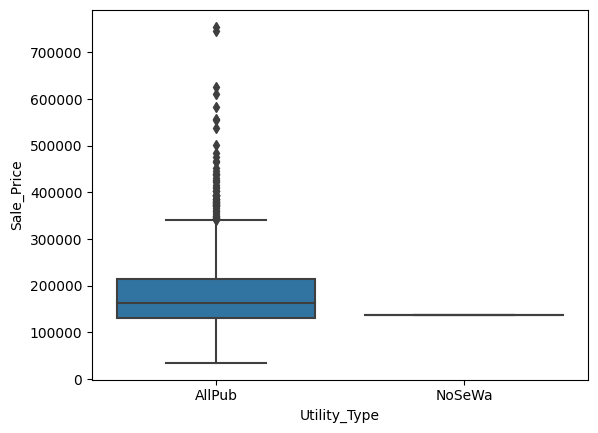

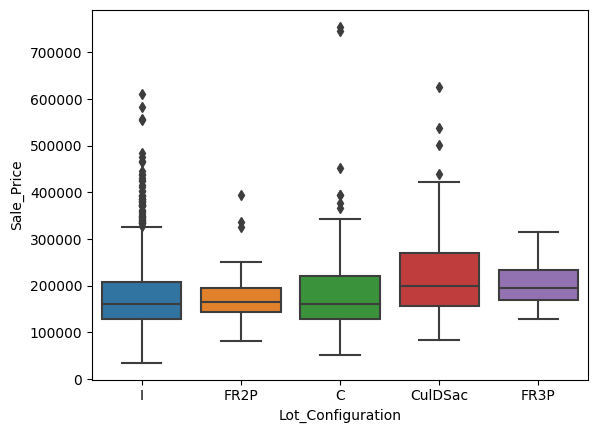

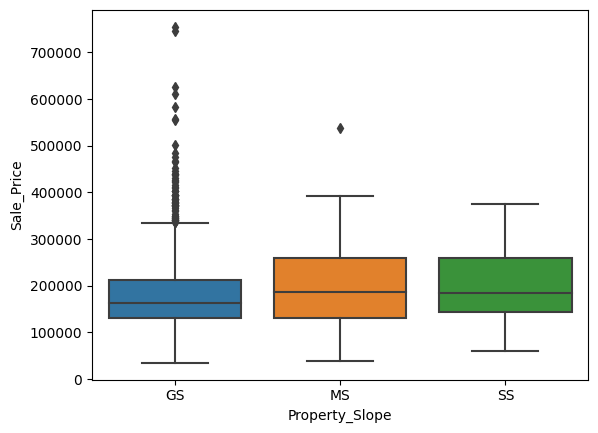

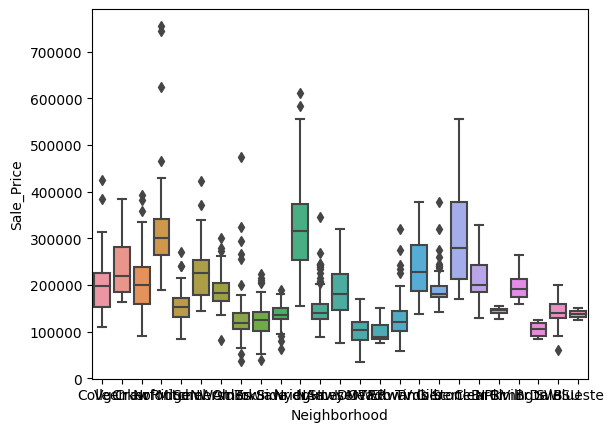

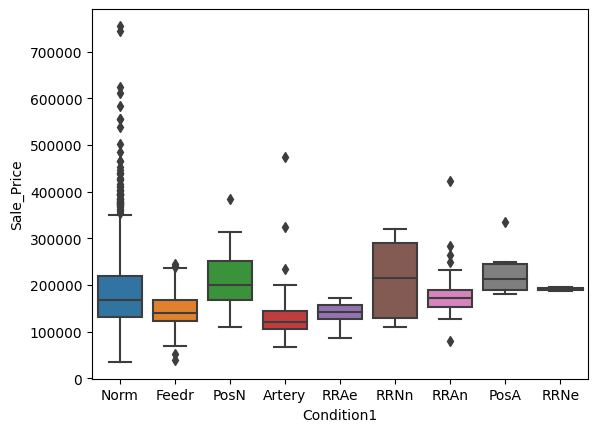

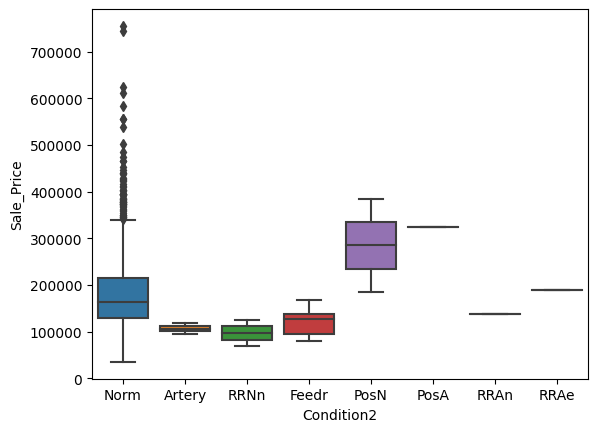

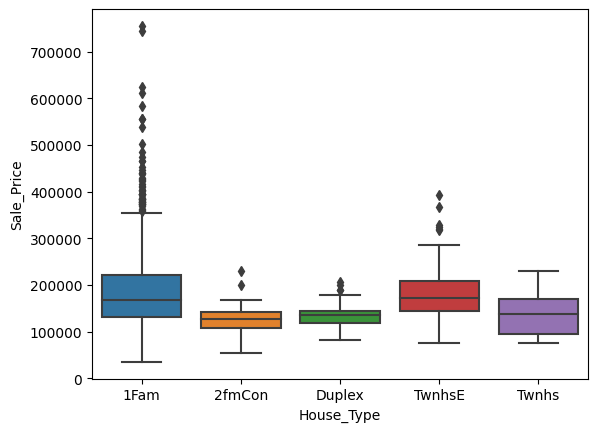

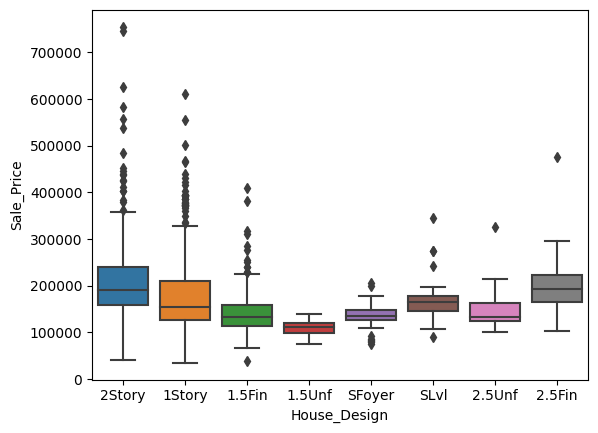

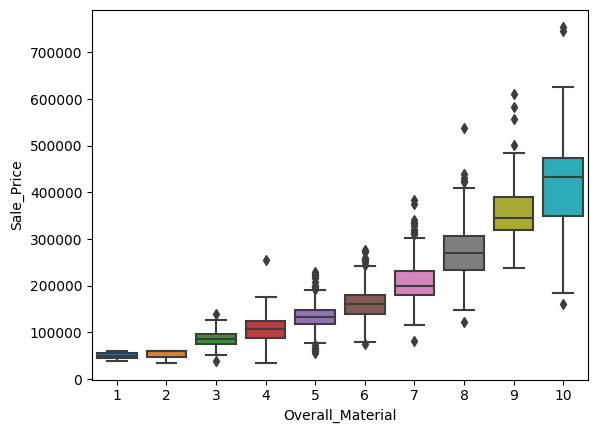

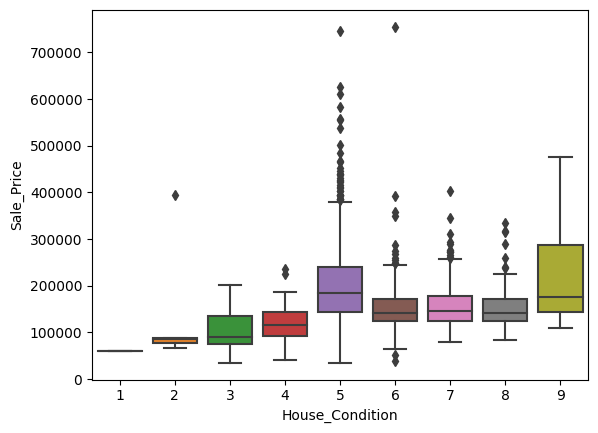

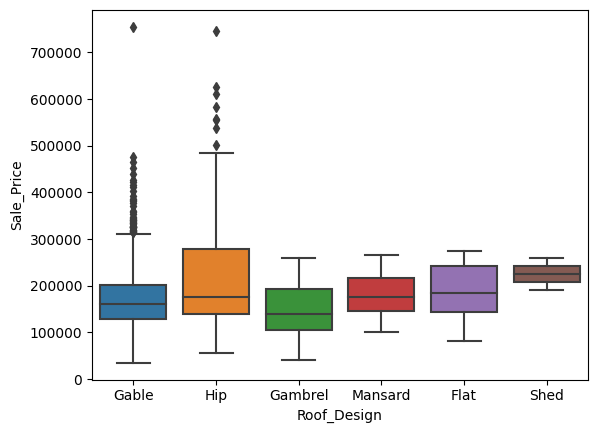

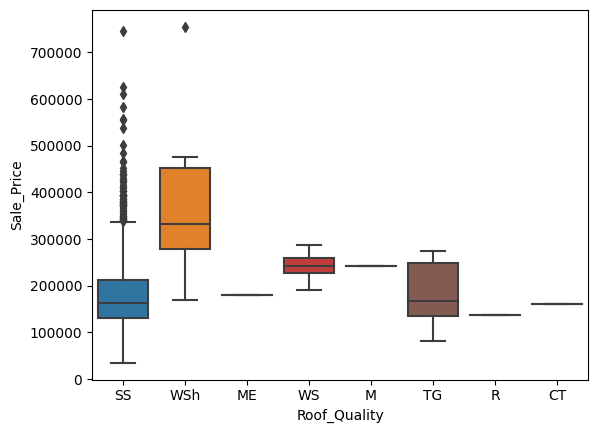

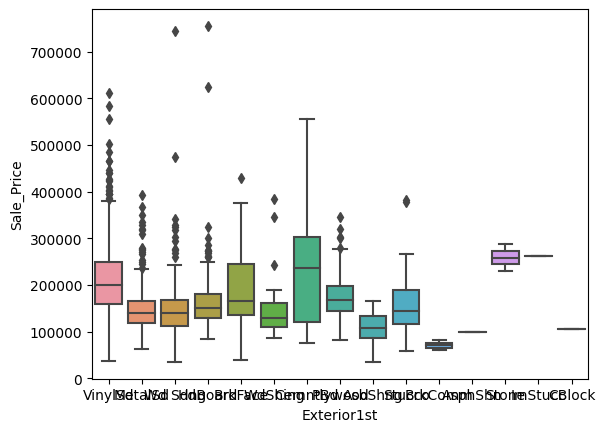

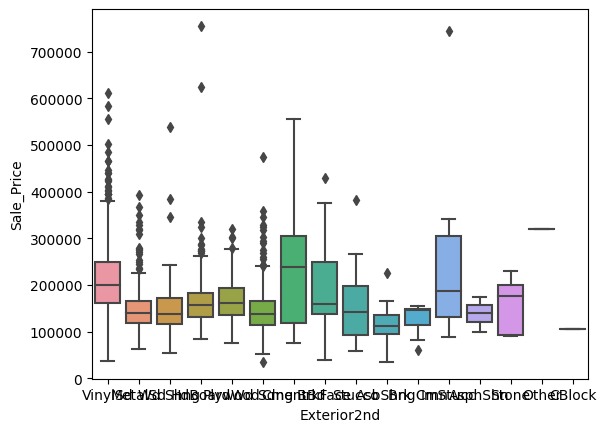

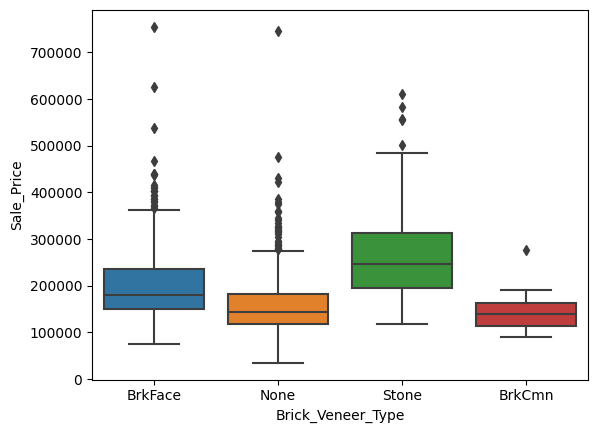

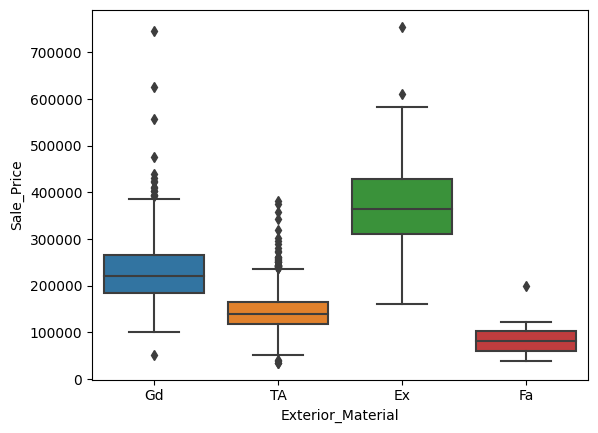

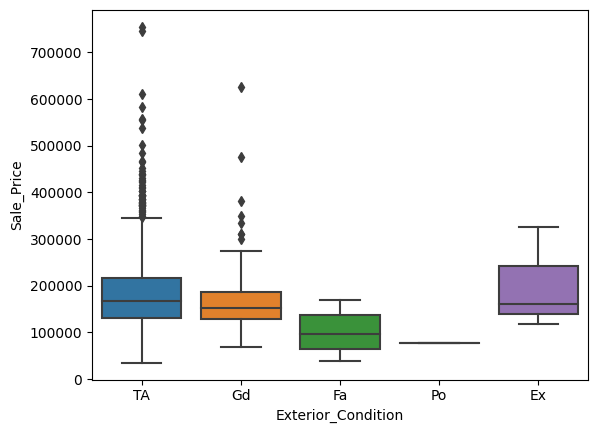

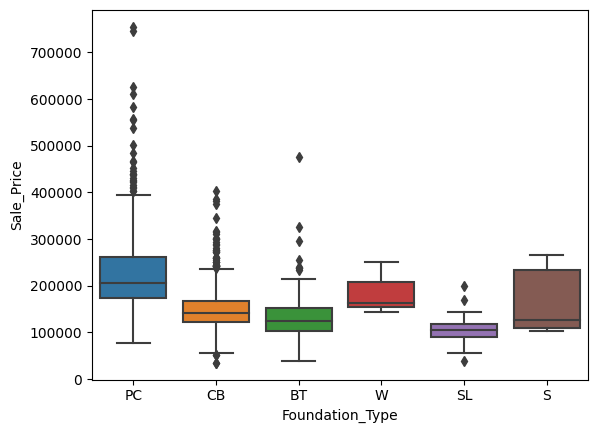

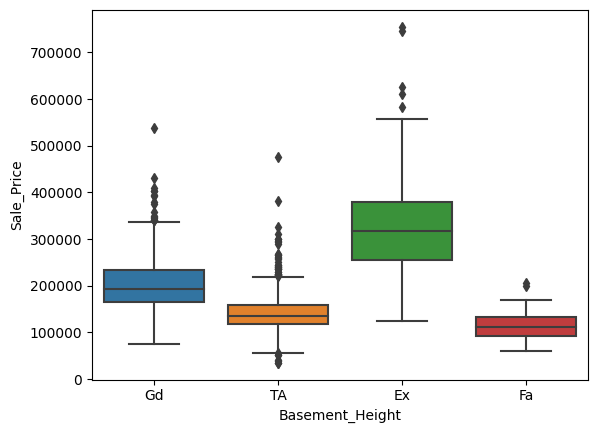

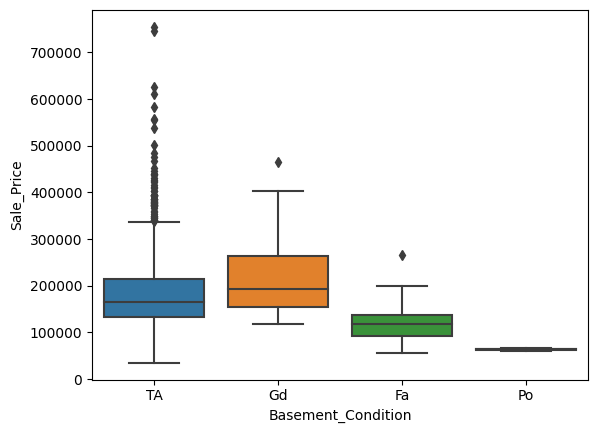

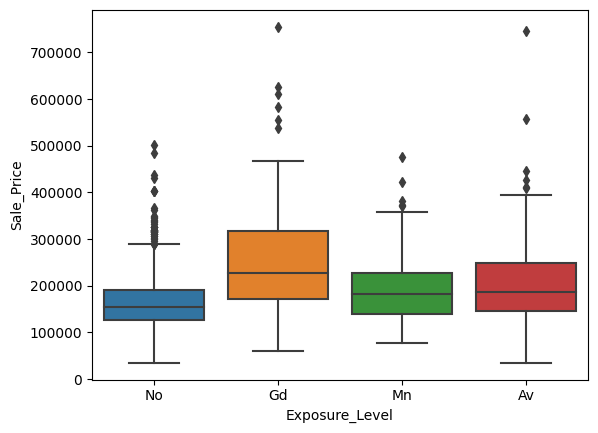

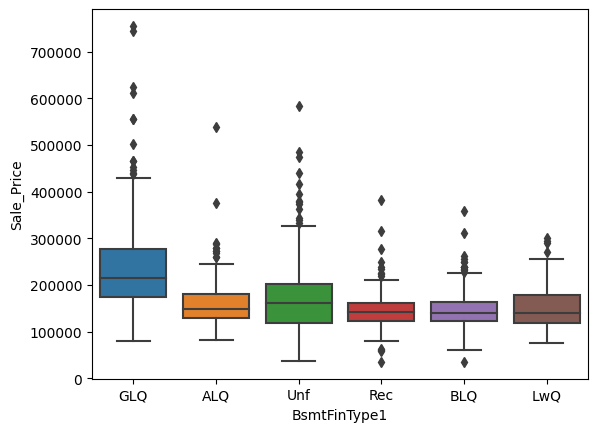

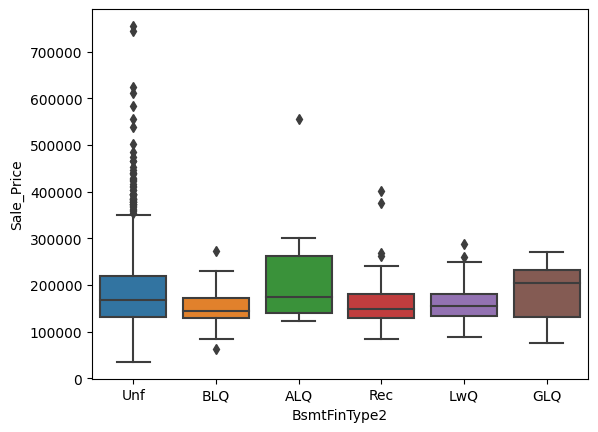

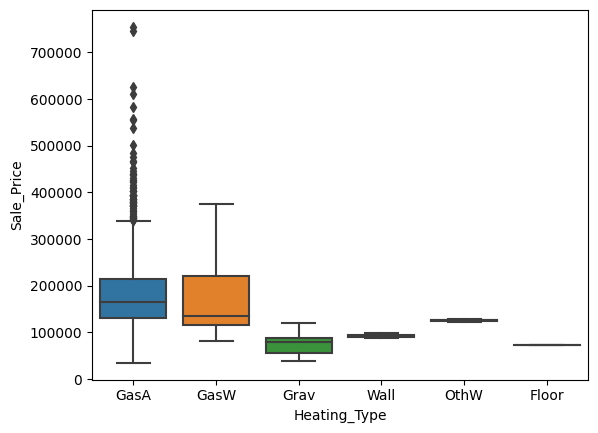

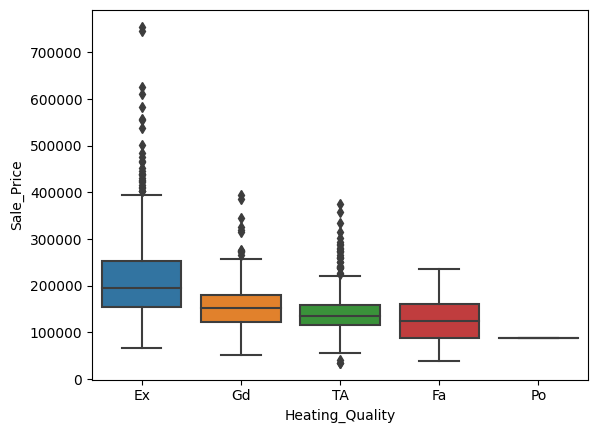

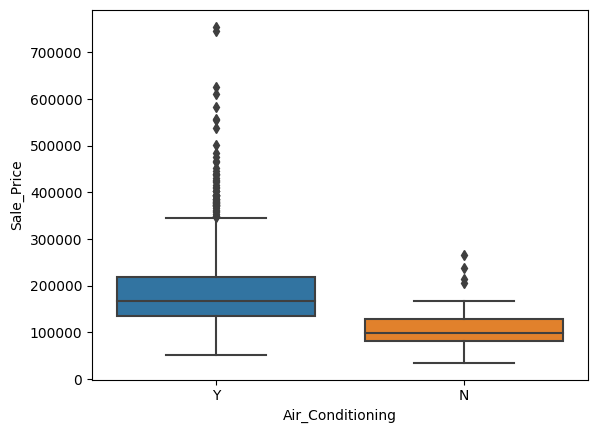

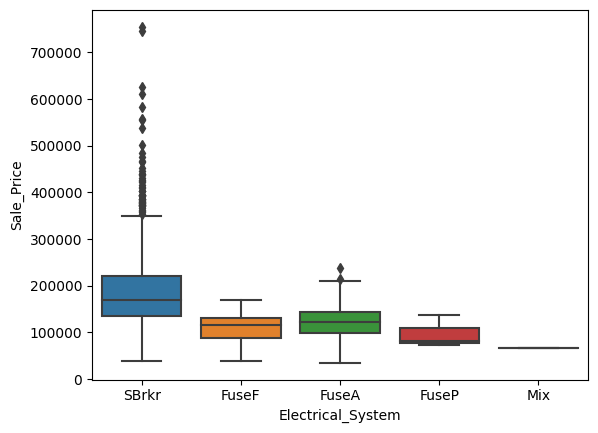

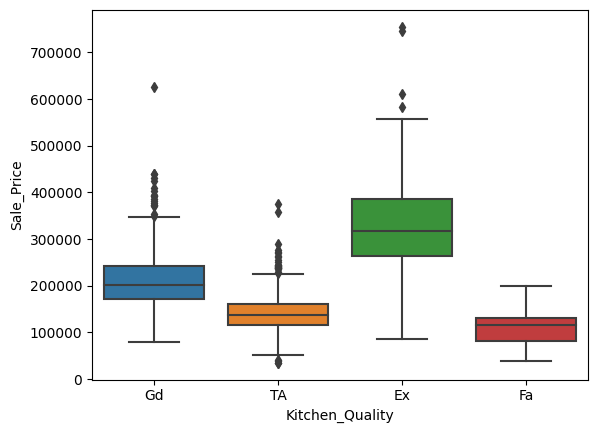

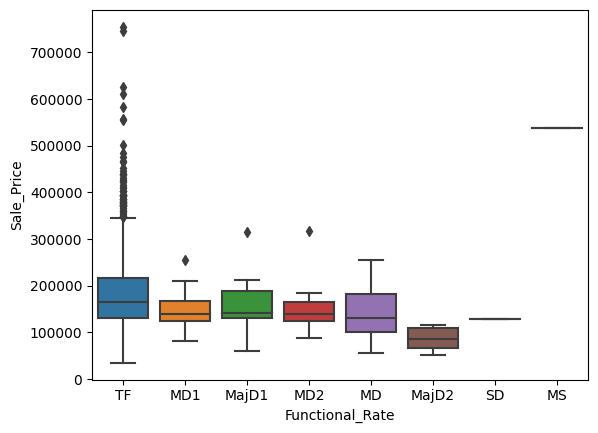

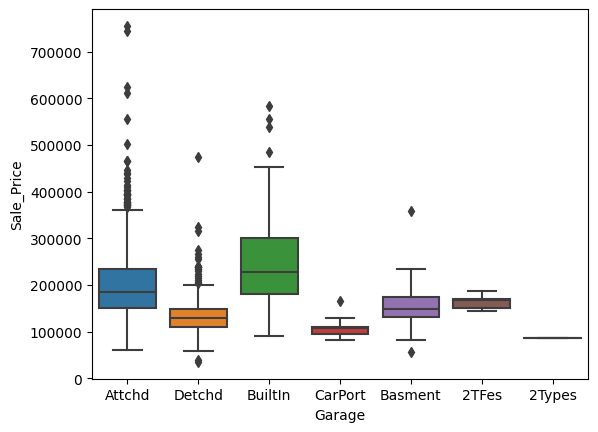

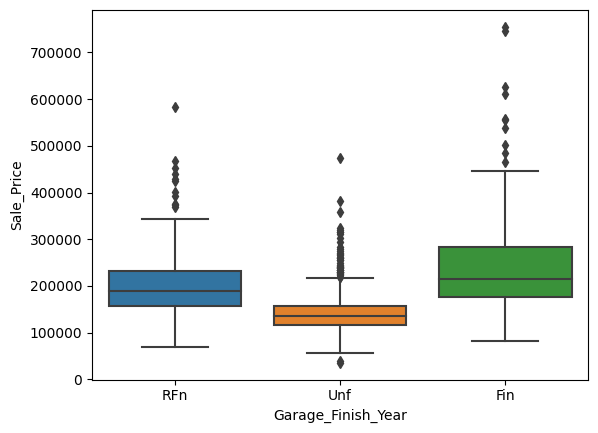

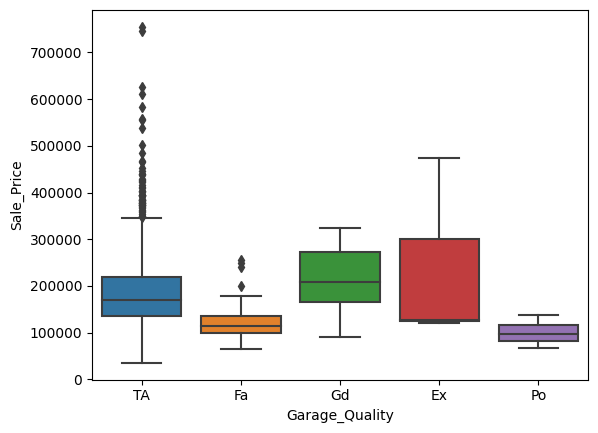

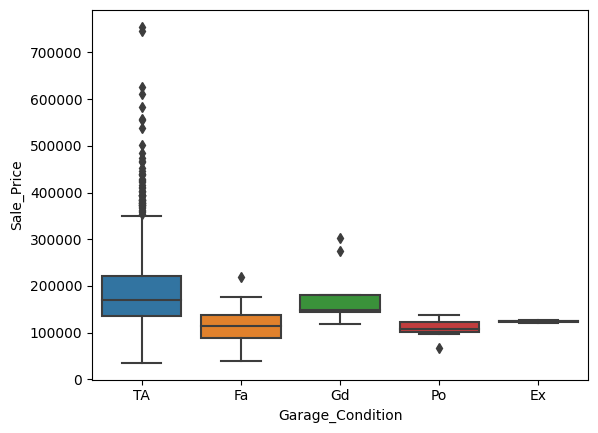

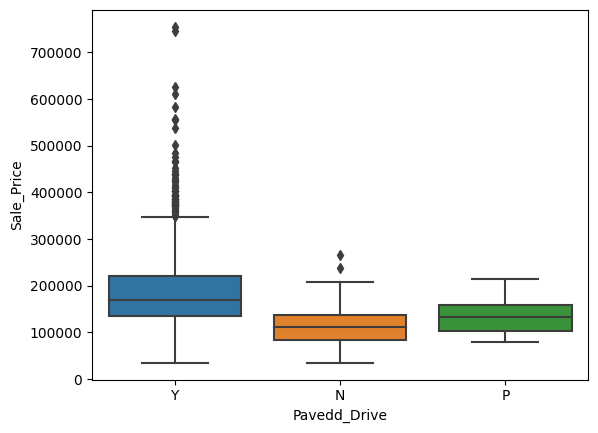

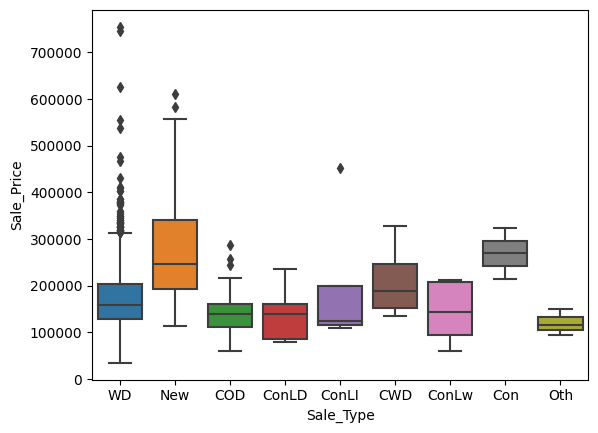

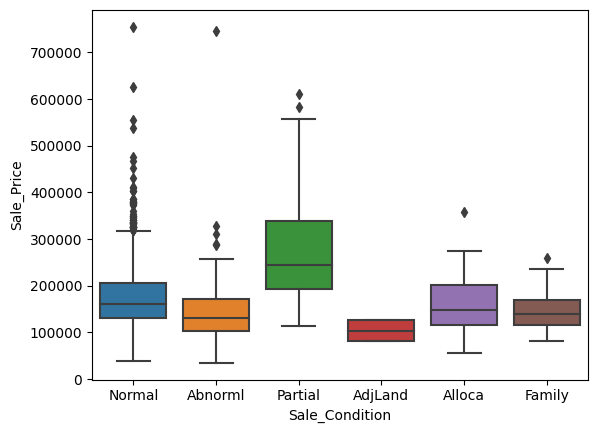

In [48]:
#we can also do a for loop and iterarte over the categorical variables to create multiple plots

from matplotlib.pyplot import figure
for i in train_cat.columns:
    figure()
    sns.boxplot(y=train['Sale_Price'],x=train_cat[i])
    

# Creating dummy variables for categirical variables in the training dataset

In [49]:
train=pd.get_dummies(train,drop_first=True)

In [50]:
train.shape

(1459, 256)

In [51]:
train_do_not_drop_first=pd.get_dummies(train,drop_first=False)

In [52]:
train_do_not_drop_first.shape

(1459, 256)

In [53]:
train.head(10)

Lot_Size  Construction_Year  Remodel_Year  Brick_Veneer_Area  BsmtFinSF1  \
0    8450.0               2003          2003              196.0       706.0   
1    9600.0               1976          1976                0.0       978.0   
2   11250.0               2001          2002              162.0       486.0   
3    9550.0               1915          1970                0.0       216.0   
4   14260.0               2000          2000              350.0       655.0   
5   14115.0               1993          1995                0.0       732.0   
6   10084.0               2004          2005              186.0      1369.0   
7   10382.0               1973          1973              240.0       859.0   
8    6120.0               1931          1950                0.0         0.0   
9    7420.0               1939          1950                0.0       851.0   

   First_Floor_Area  Second_Floor_Area  LowQualFinSF  Grade_Living_Area  \
0               856                854             0               1710   
1              1262                  0             0               1262   
2               920                866             0               1786   
3               961                756             0               1717   
4              1145               1053             0               2198   
5               796                566             0               1362   
6              1694                  0             0               1694   
7              1107                983             0               2090   
8              1022                752             0               1774   
9              1077                  0             0               1077   

   Underground_Full_Bathroom  ...  Sale_Type_ConLI  Sale_Type_ConLw  \
0                        1.0  ...                0                0   
1                        0.0  ...                0                0   
2                        1.0  ...                0                0   
3                        1.0  ...                0                0   
4                        1.0  ...                0                0   
5                        1.0  ...                0                0   
6                        1.0  ...                0                0   
7                        1.0  ...                0                0   
8                        0.0  ...                0                0   
9                        1.0  ...                0                0   

   Sale_Type_New  Sale_Type_Oth  Sale_Type_WD  Sale_Condition_AdjLand  \
0              0              0             1                       0   
1              0              0             1                       0   
2              0              0             1                       0   
3              0              0             1                       0   
4              0              0             1                       0   
5              0              0             1                       0   
6              0              0             1                       0   
7              0              0             1                       0   
8              0              0             1                       0   
9              0              0             1                       0   

   Sale_Condition_Alloca  Sale_Condition_Family  Sale_Condition_Normal  \
0                      0                      0                      1   
1                      0                      0                      1   
2                      0                      0                      1   
3                      0                      0                      0   
4                      0                      0                      1   
5                      0                      0                      1   
6                      0                      0                      1   
7                      0                      0                      1   
8                      0                      0        

# Univariate analysis of numerical variables

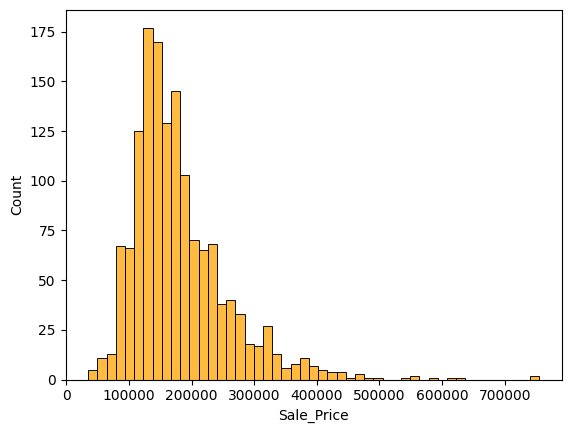

In [54]:
#Dependent variable

sns.histplot(train['Sale_Price'],color="orange");plt.show()

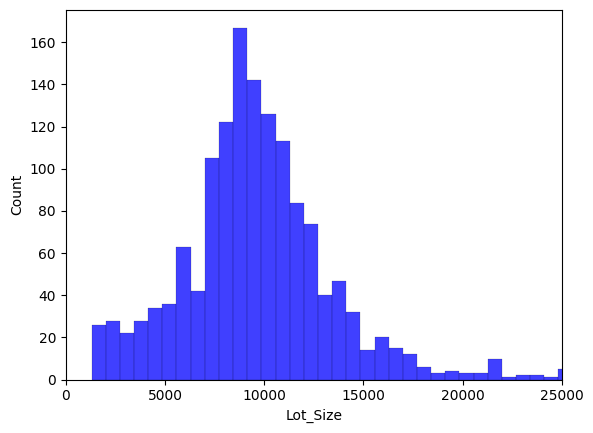

In [55]:
#input variables
sns.histplot(train['Lot_Size'],color="blue")

plt.xlim(0,25000);plt.show()

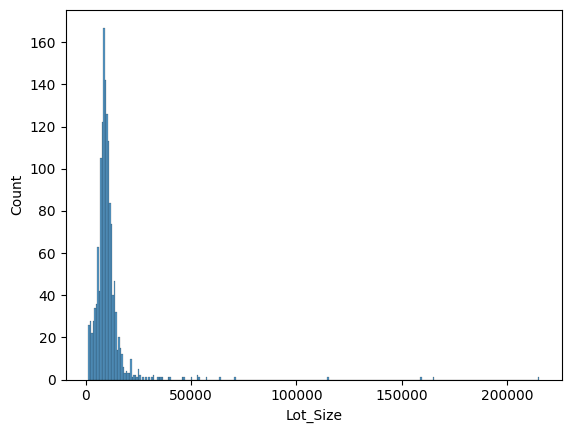

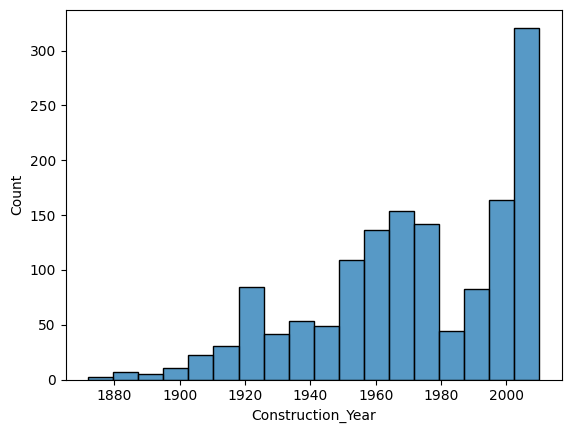

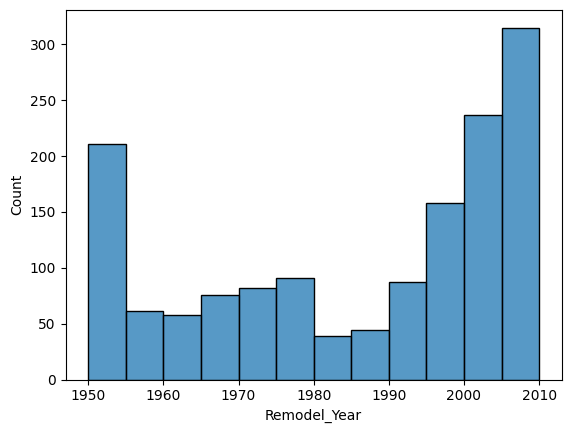

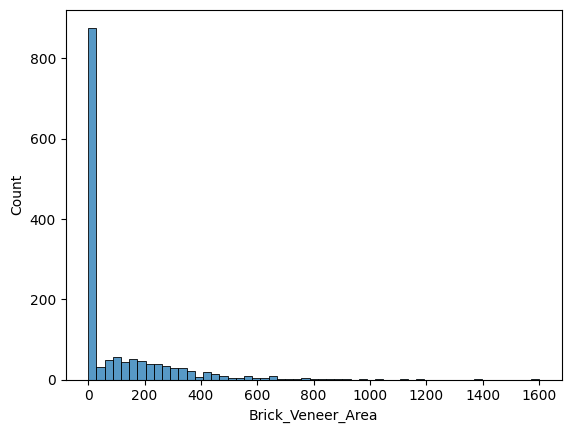

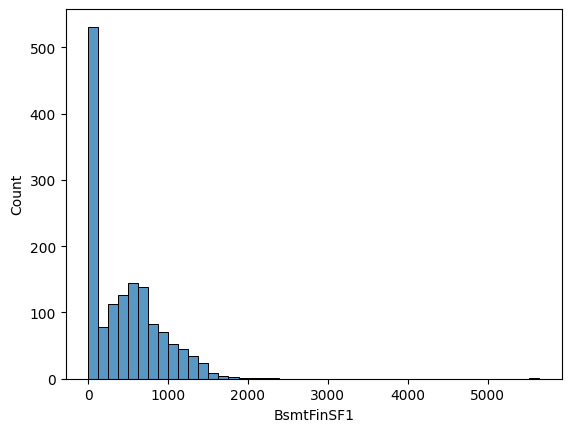

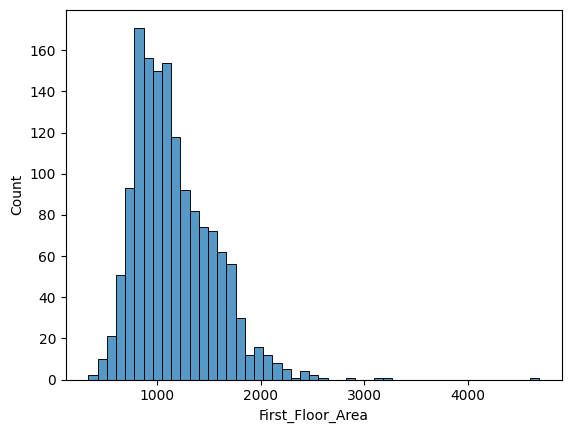

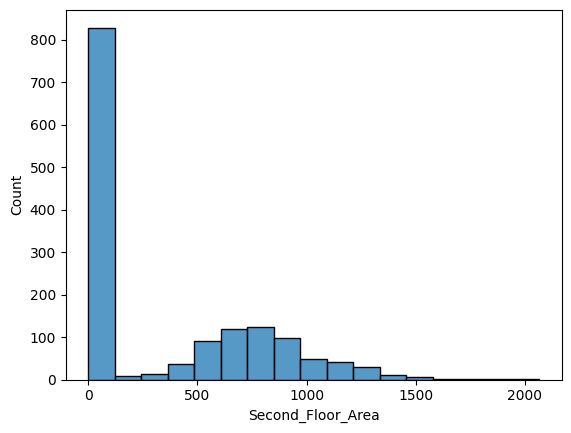

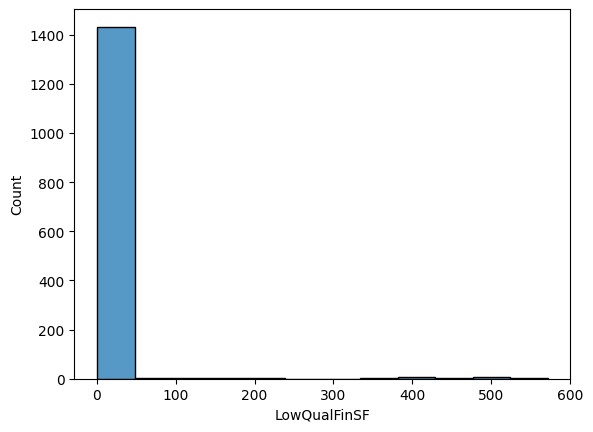

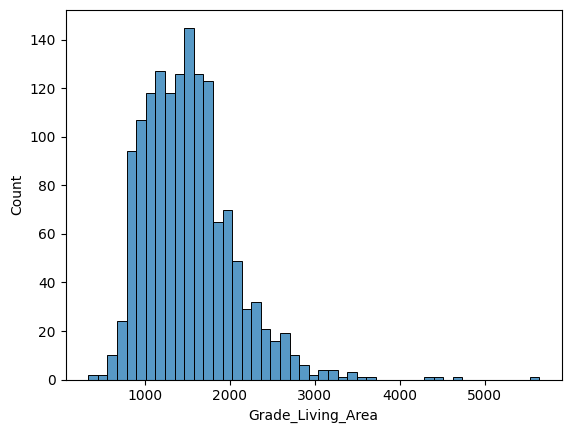

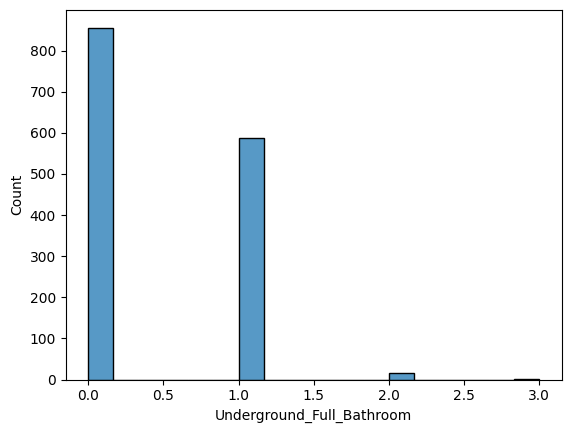

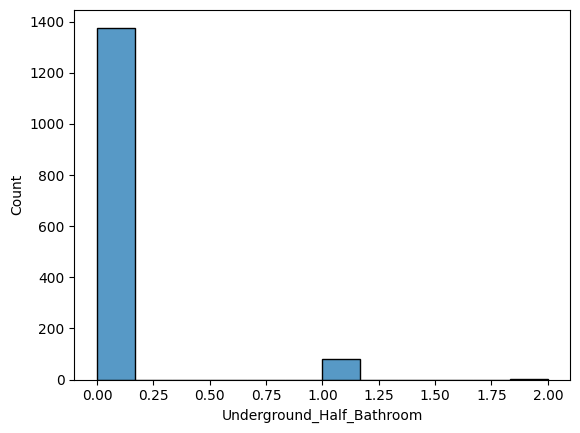

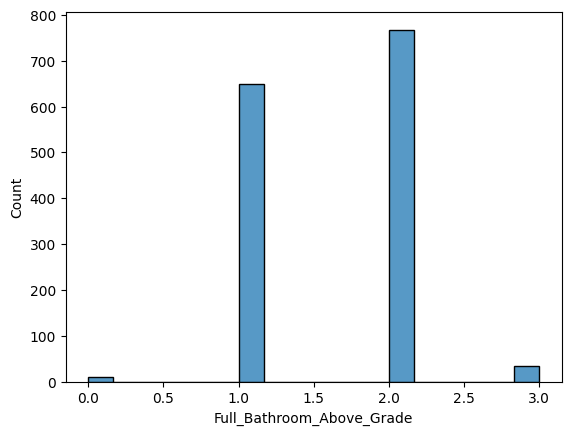

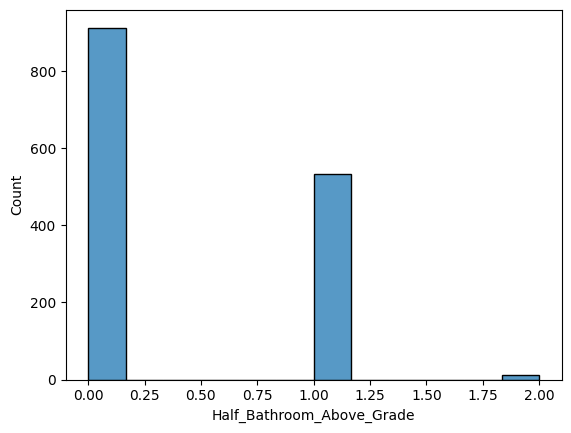

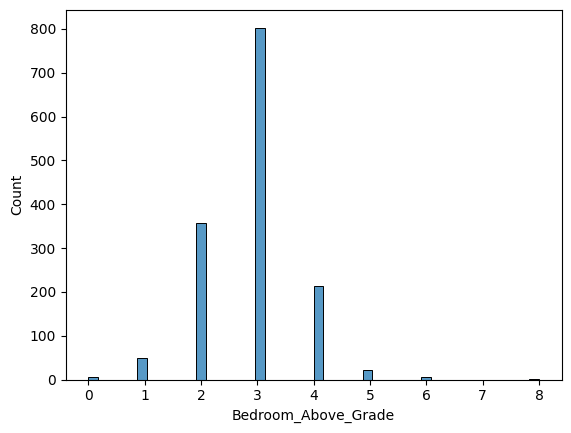

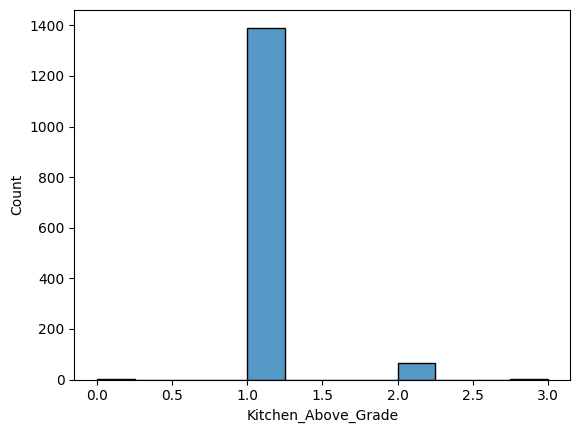

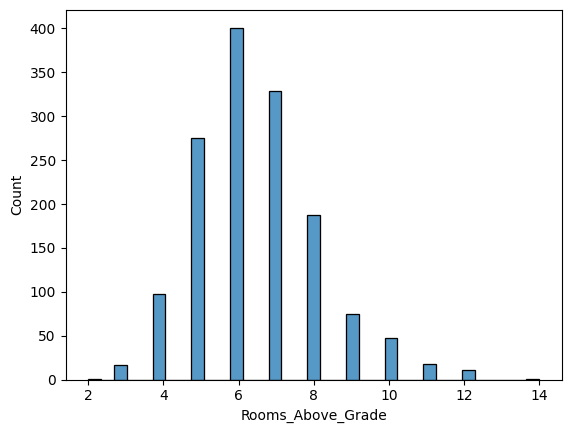

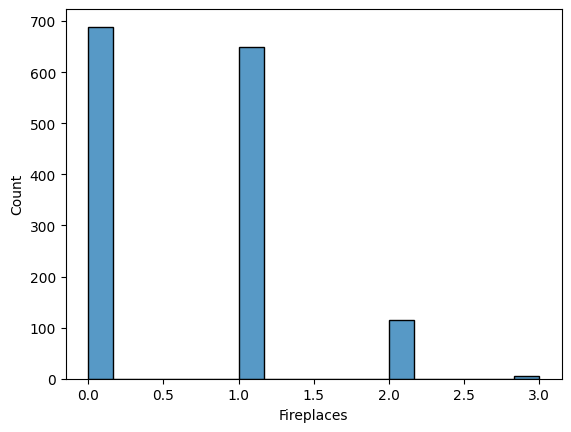

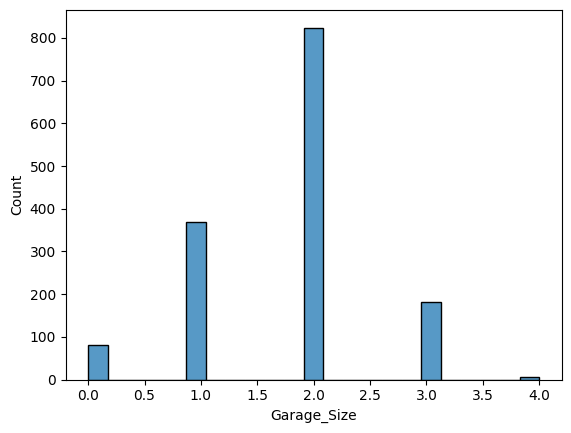

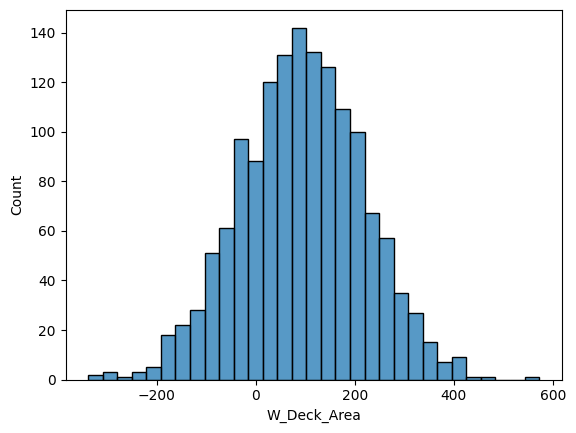

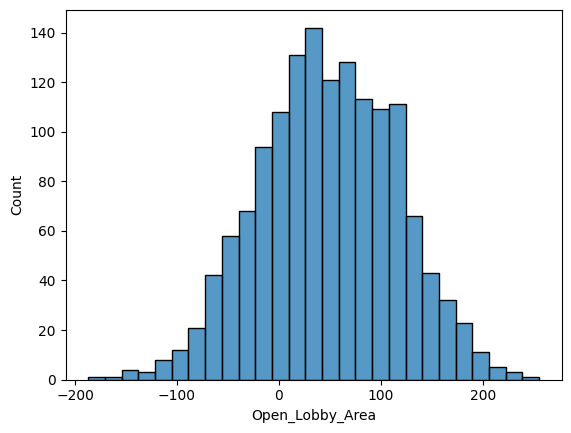

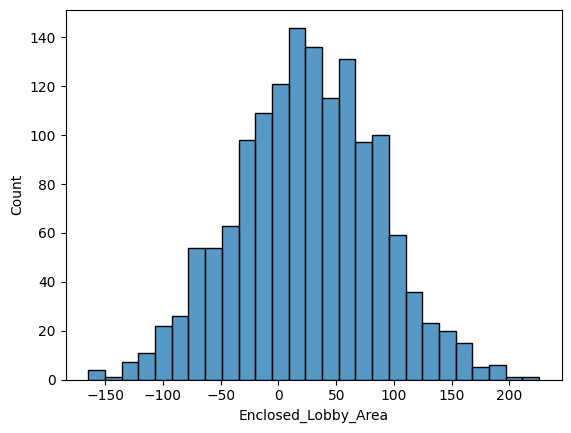

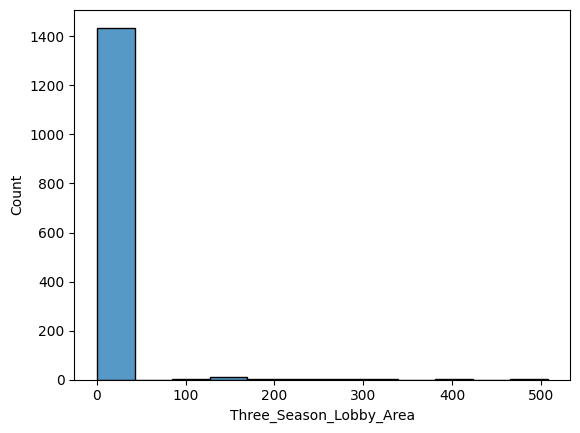

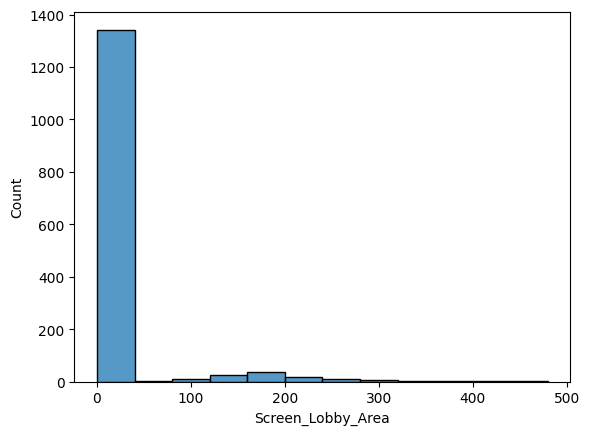

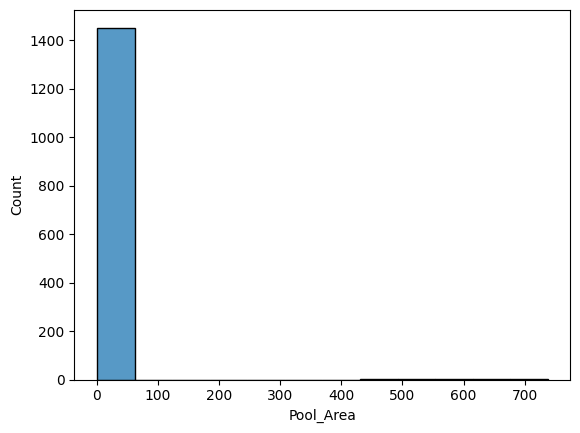

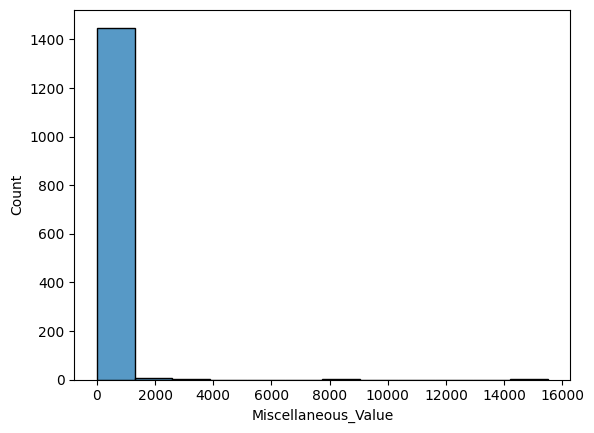

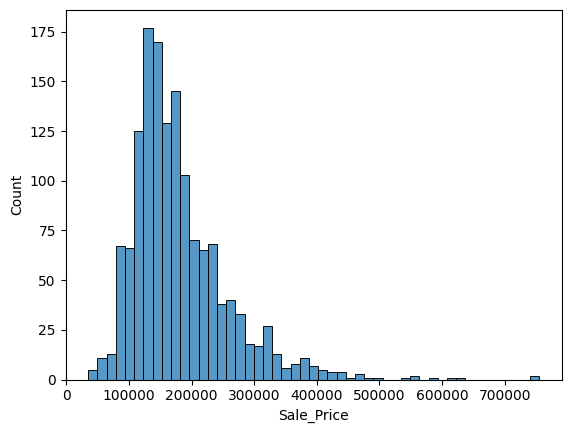

In [56]:
from matplotlib.pyplot import figure
for i in train_num.columns:
    figure()
    sns.histplot(train_num[i])

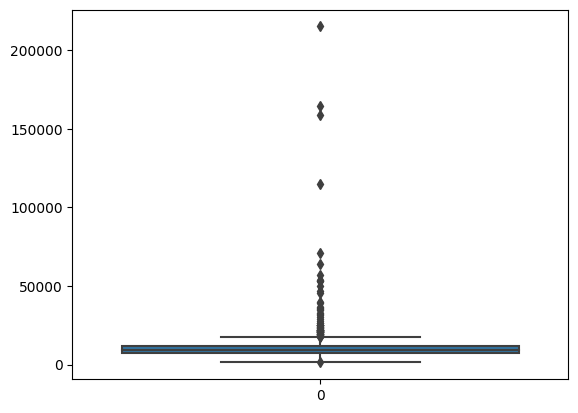

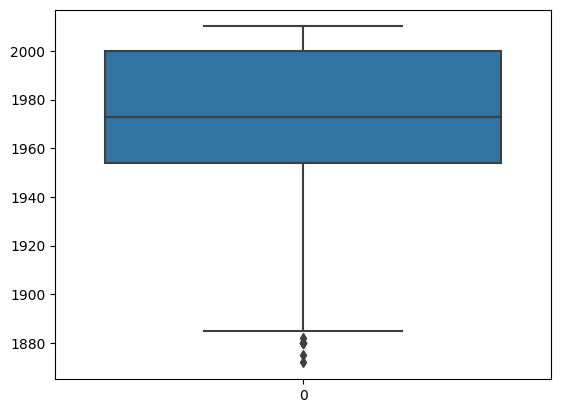

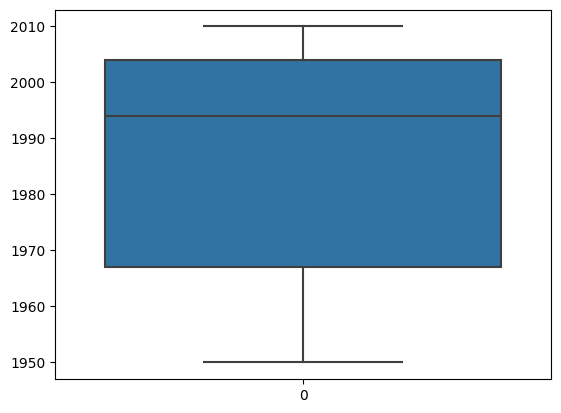

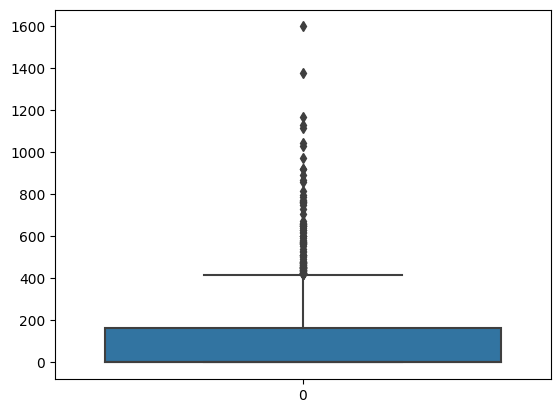

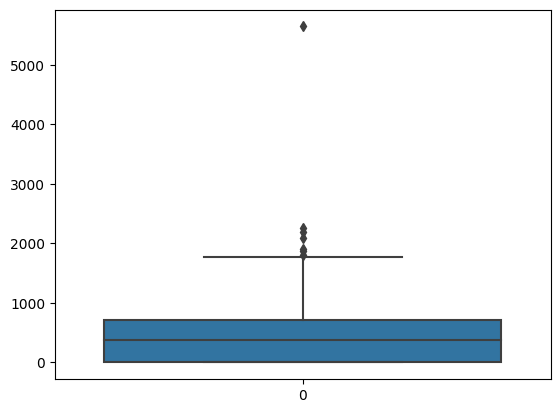

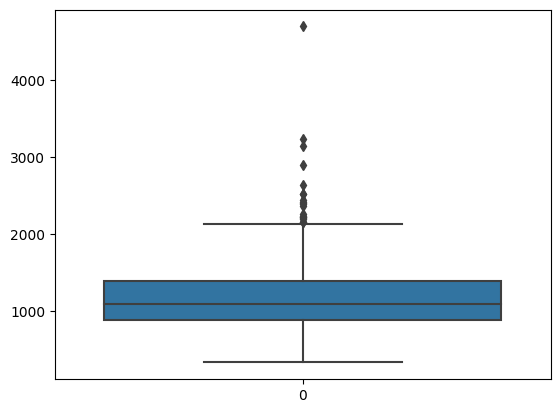

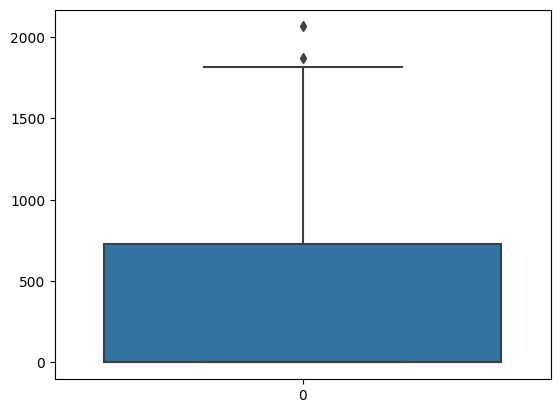

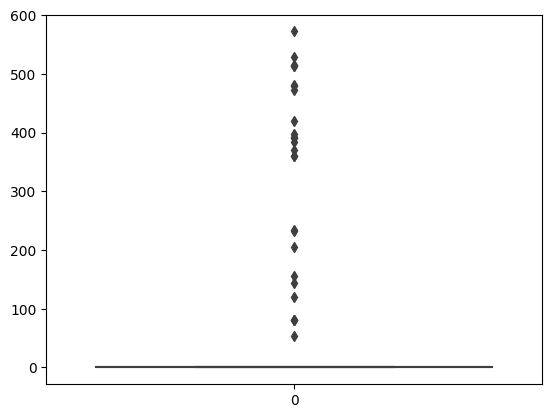

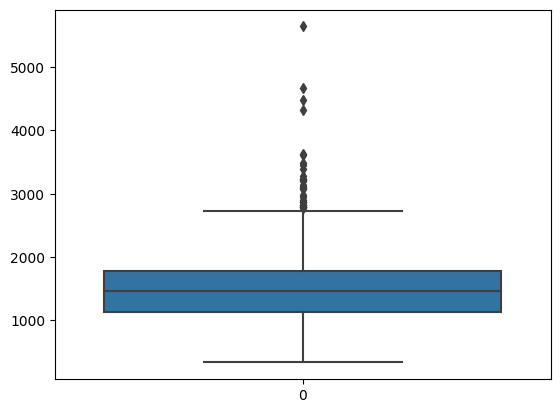

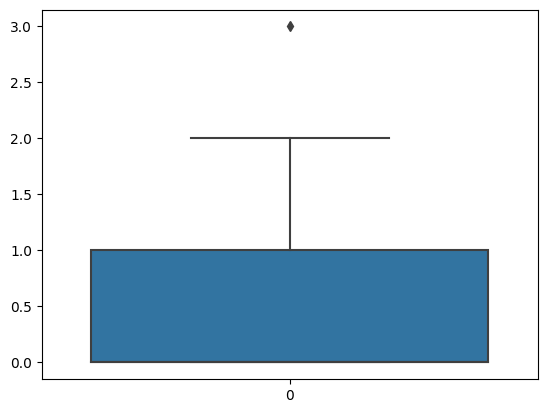

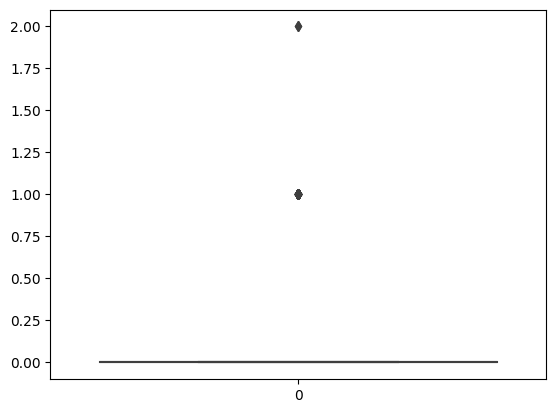

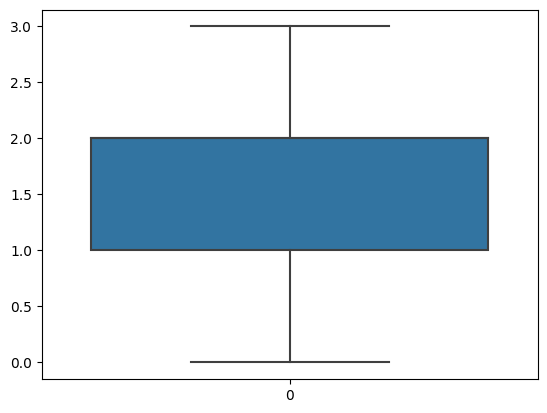

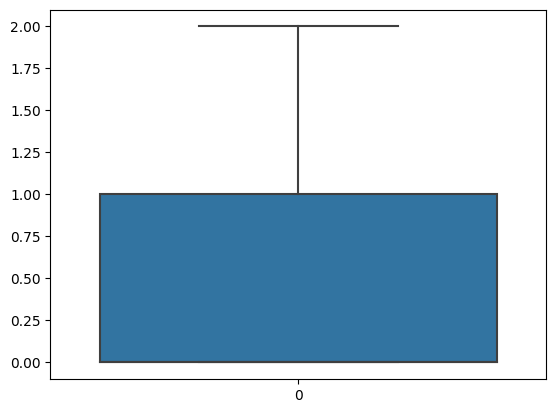

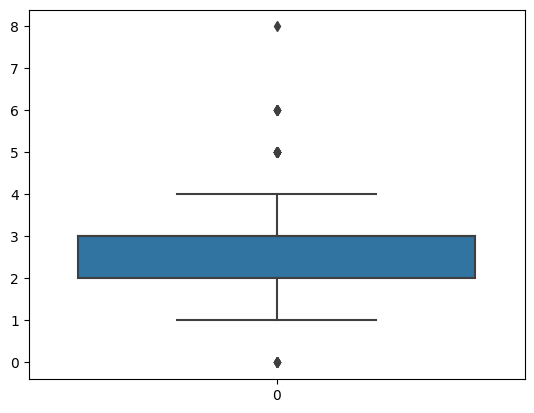

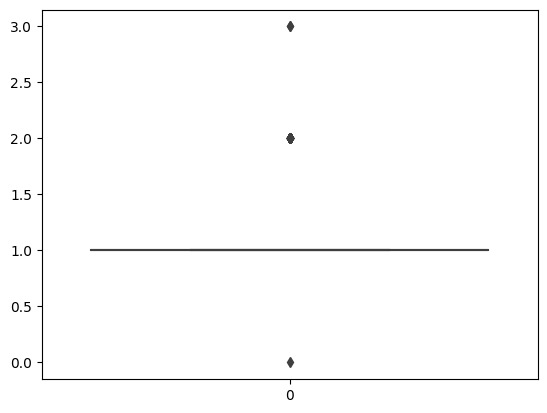

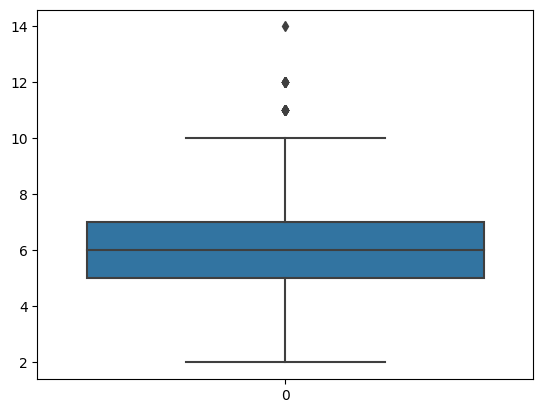

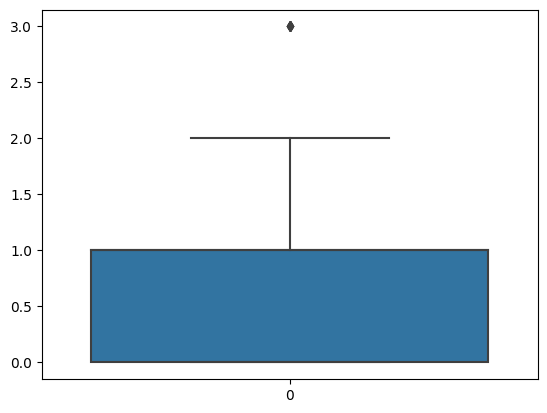

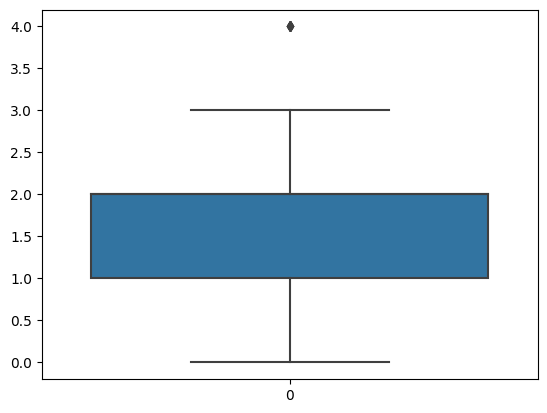

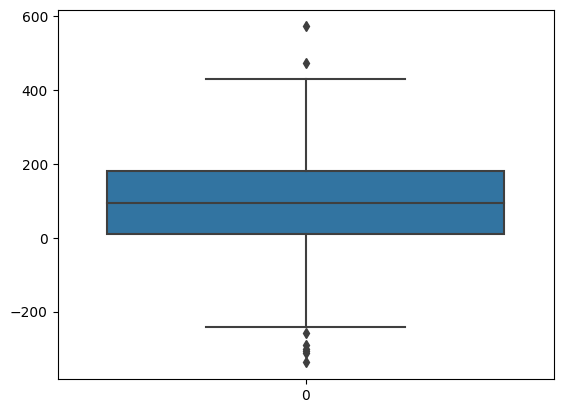

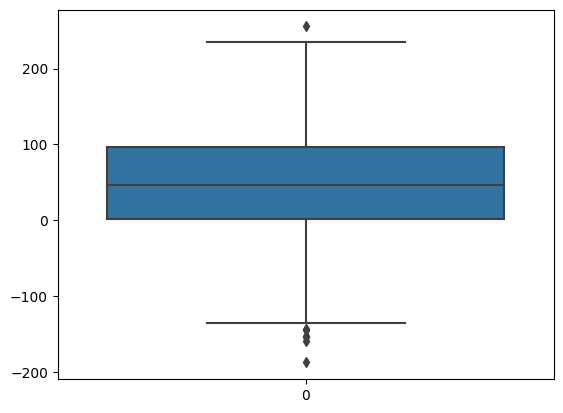

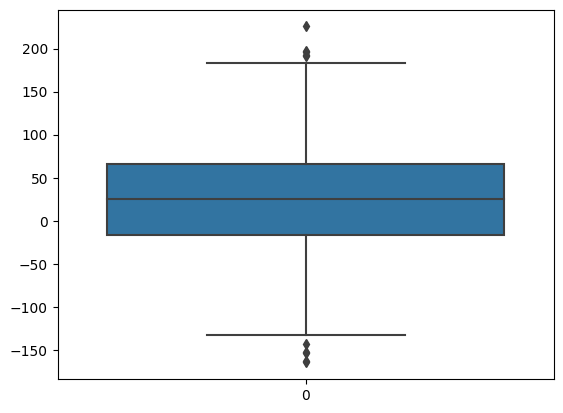

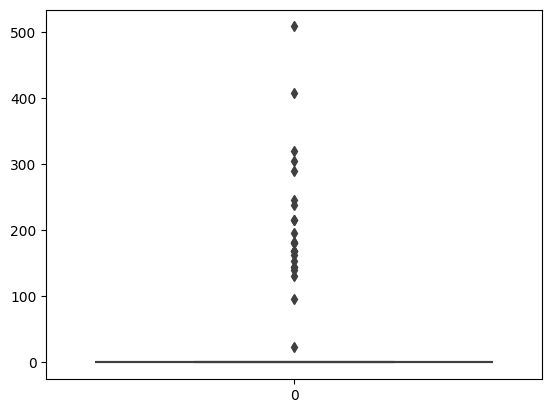

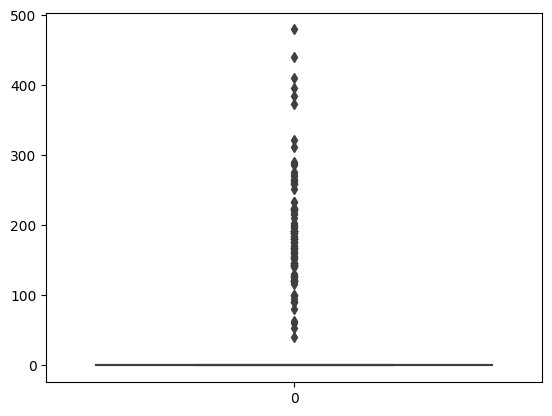

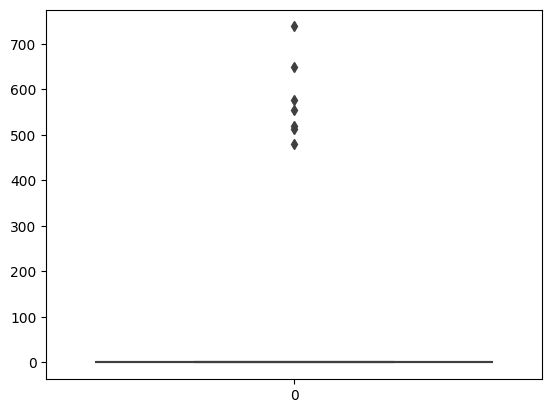

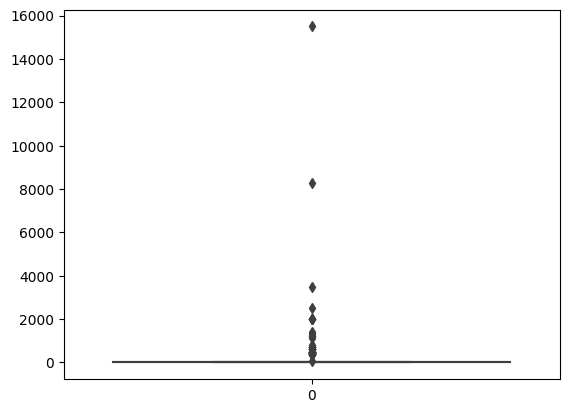

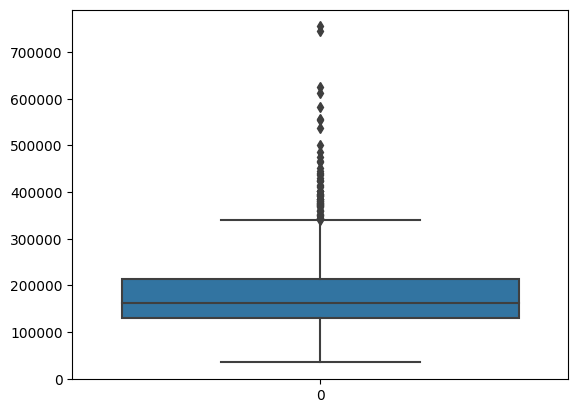

In [57]:
from matplotlib.pyplot import figure
for i in train_num.columns:
    figure()
    sns.boxplot(train_num[i])

# Bivariate analysis-correlation values and correlation heatmap

In [58]:
#calculating correlation among numeric variable 
corr_matrix = train_num.corr() 

corr_matrix

Lot_Size  Construction_Year  Remodel_Year  \
Lot_Size                   1.000000           0.014220      0.013754   
Construction_Year          0.014220           1.000000      0.592915   
Remodel_Year               0.013754           0.592915      1.000000   
Brick_Veneer_Area          0.104149           0.315667      0.179317   
BsmtFinSF1                 0.214190           0.249689      0.129082   
First_Floor_Area           0.299491           0.282030      0.240620   
Second_Floor_Area          0.050965           0.010197      0.139574   
LowQualFinSF               0.004774          -0.183805     -0.062519   
Grade_Living_Area          0.263119           0.198959      0.287178   
Underground_Full_Bathroom  0.158265           0.187838      0.120290   
Underground_Half_Bathroom  0.048037          -0.038197     -0.012500   
Full_Bathroom_Above_Grade  0.126035           0.468301      0.438667   
Half_Bathroom_Above_Grade  0.014316           0.242960      0.184294   
Bedroom_Above_Grade        0.119698          -0.070630     -0.040486   
Kitchen_Above_Grade       -0.017793          -0.174836     -0.149787   
Rooms_Above_Grade          0.190009           0.095549      0.191597   
Fireplaces                 0.271411           0.147629      0.112024   
Garage_Size                0.154886           0.537906      0.420230   
W_Deck_Area                0.030025           0.007441      0.045620   
Open_Lobby_Area            0.032699          -0.045182     -0.061111   
Enclosed_Lobby_Area        0.003951          -0.006849     -0.010810   
Three_Season_Lobby_Area    0.020418           0.031339      0.045224   
Screen_Lobby_Area          0.043151          -0.050405     -0.038932   
Pool_Area                  0.077670           0.004940      0.005786   
Miscellaneous_Value        0.038064          -0.034396     -0.010347   
Sale_Price                 0.263843           0.522877      0.507015   

                           Brick_Veneer_Area  BsmtFinSF1  First_Floor_Area  \
Lot_Size                            0.104149    0.214190          0.299491   
Construction_Year                   0.315667    0.249689          0.282030   
Remodel_Year                        0.179317    0.129082          0.240620   
Brick_Veneer_Area                   1.000000    0.265169          0.344644   
BsmtFinSF1                          0.265169    1.000000          0.445841   
First_Floor_Area                    0.344644    0.445841          1.000000   
Second_Floor_Area                   0.174305   -0.136680         -0.202562   
LowQualFinSF                       -0.069127   -0.064449         -0.014221   
Grade_Living_Area                   0.390739    0.208527          0.566164   
Underground_Full_Bathroom           0.085795    0.649001          0.244595   
Underground_Half_Bathroom           0.026581    0.067576          0.001996   
Full_Bathroom_Above_Grade           0.276560    0.059175          0.380952   
Half_Bathroom_Above_Grade           0.202058    0.003552         -0.120184   
Bedroom_Above_Grade                 0.102898   -0.107477          0.127377   
Kitchen_Above_Grade                -0.037698   -0.080905          0.068138   
Rooms_Above_Grade                   0.280598    0.044513          0.409591   
Fireplaces                          0.248800    0.260708          0.410824   
Garage_Size                         0.363972    0.224786          0.439655   
W_Deck_Area                         0.015000    0.036518          0.046259   
Open_Lobby_Area                     0.001160    0.038410          0.030272   
Enclosed_Lobby_Area                 0.013736    0.007652          0.025440   
Three_Season_Lobby_Area             0.018752    0.026525          0.056125   
Screen_Lobby_Area                   0.061367    0.062194          0.088807   
Pool_Area                           0.011697    0.140566          0.131539   
Miscellaneous_Value                -0.029854    0.003623         -0.021082   
Sale_Price                          0.477411    0.3867

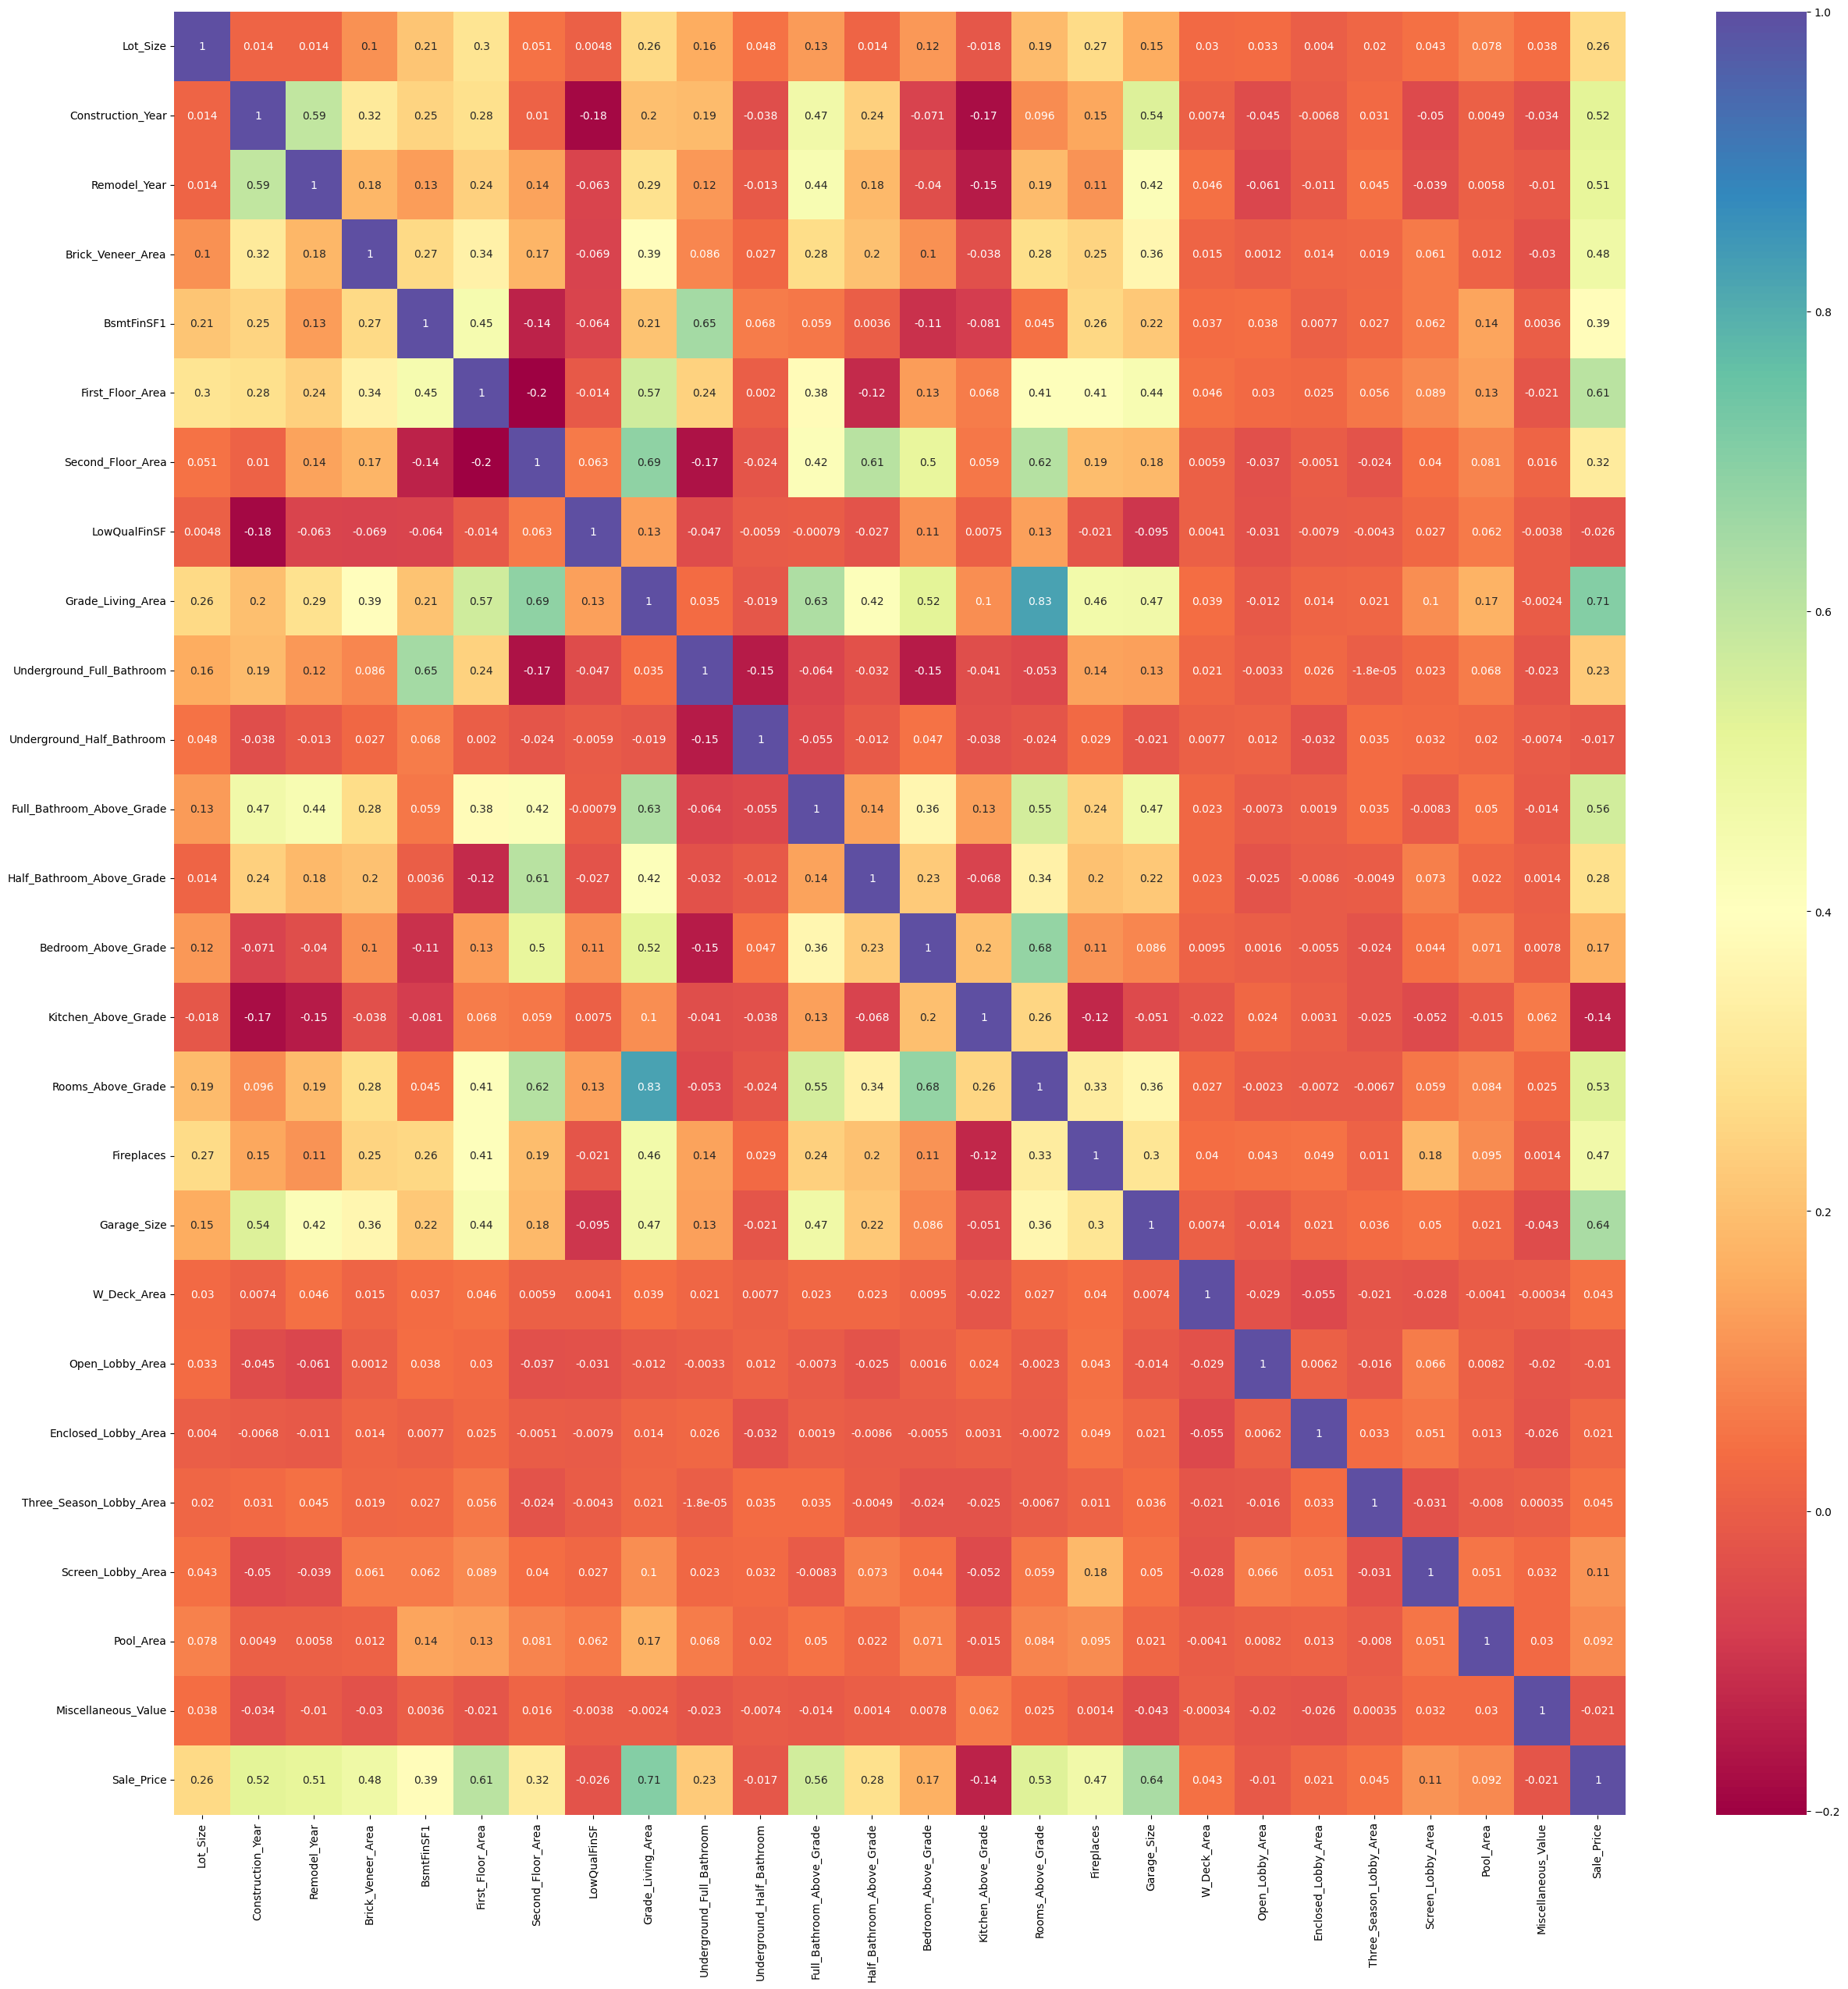

In [60]:
#calculating correlation among numeric variable 
#corr_matrix = train_num.corr() 

#filter correlation values above 0.5
#filter_corr = corr_matrix[corr_matrix > 0.5]

#plot correlation matrix
plt.figure(figsize=(30,30))

sns.heatmap(corr_matrix,cmap='Spectral',annot=True);
plt.savefig("C:\\Users\\Ankita\\Desktop\\imarticus\\Linear Regression_Property-Price")

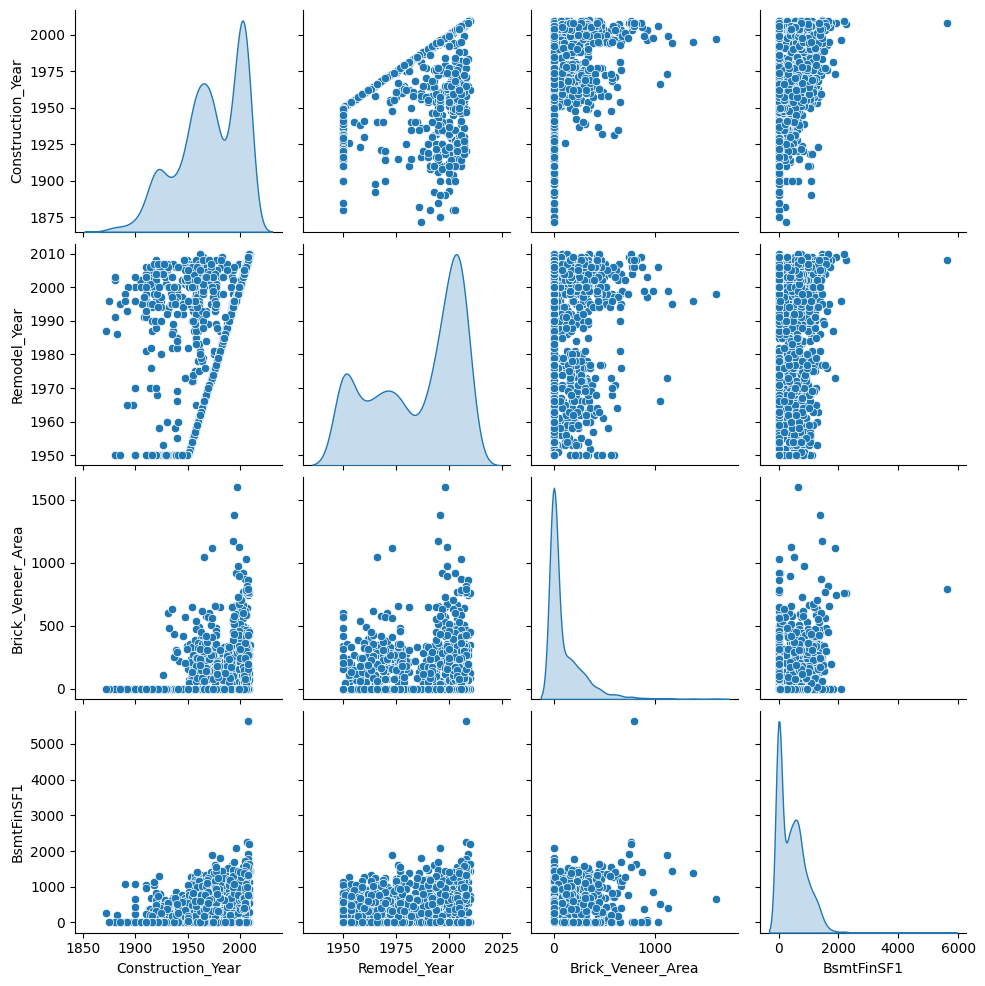

In [61]:
sns.pairplot(train_num.iloc[:,1:5], diag_kind="kde");plt.show()

In [62]:
#?plt.savefig

In [63]:
train.isnull().sum()

Lot_Size                  0
Construction_Year         0
Remodel_Year              0
Brick_Veneer_Area         8
BsmtFinSF1                0
                         ..
Sale_Condition_AdjLand    0
Sale_Condition_Alloca     0
Sale_Condition_Family     0
Sale_Condition_Normal     0
Sale_Condition_Partial    0
Length: 256, dtype: int64

In [64]:
train=train.dropna(axis=0)

In [93]:
!pip install statsmodels


     ---------------------------------------- 9.2/9.2 MB 5.9 MB/s eta 0:00:00


In [94]:
import statsmodels.api as sm


In [95]:
# create feature and response variable set
# we create train and test sample from our dataset
from sklearn.model_selection import train_test_split
# create feature and response varibles
X = train.drop(['Sale_Price'], axis=1) #drop the dependent var from the dataset and retain  Only  the input variables
X=sm.add_constant(X) #this is for including the intyercept or the Beeta zero
Y = train['Sale_Price']#only the dependent variable
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3,random_state=123)#random_state is same as set.seed
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1015, 256) (436, 256) (1015,) (436,)


In [96]:
#!pip install statsmodels

from statsmodels.api import OLS

model_definition=OLS(y_train,x_train)

model_building=model_definition.fit()

print(model_building.summary())

                            OLS Regression Results                            
Dep. Variable:             Sale_Price   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     56.09
Date:                Sun, 30 Apr 2023   Prob (F-statistic):               0.00
Time:                        14:17:49   Log-Likelihood:                -11420.
No. Observations:                1015   AIC:                         2.332e+04
Df Residuals:                     773   BIC:                         2.451e+04
Df Model:                         241                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [97]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [98]:
calc_vif(train)

variables        VIF
0                  Lot_Size   3.521673
1         Construction_Year  17.604164
2              Remodel_Year   3.753174
3         Brick_Veneer_Area   3.142444
4                BsmtFinSF1   5.511878
..                      ...        ...
251  Sale_Condition_AdjLand   1.658701
252   Sale_Condition_Alloca   1.753255
253   Sale_Condition_Family   1.437971
254   Sale_Condition_Normal   3.480959
255  Sale_Condition_Partial  48.393499

[256 rows x 2 columns]

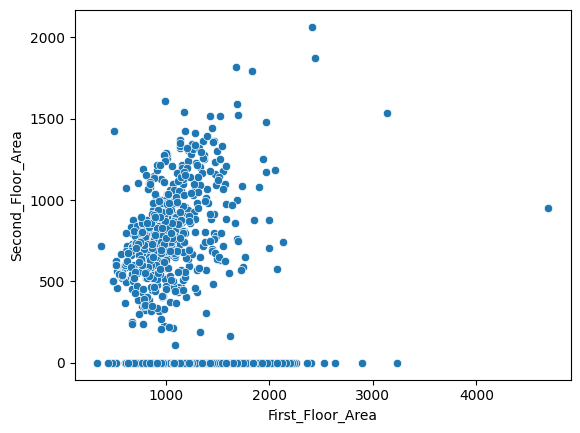

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='First_Floor_Area', y='Second_Floor_Area', data=train)

plt.show()


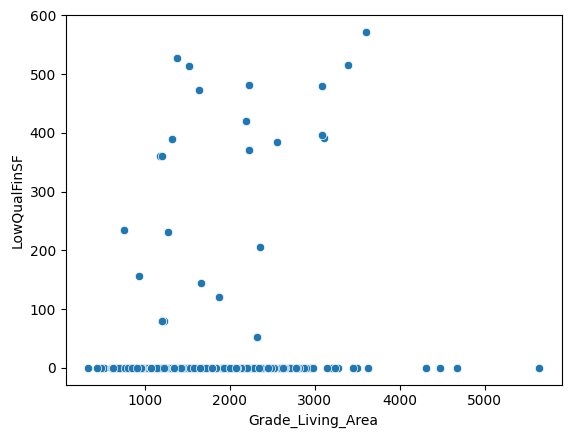

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='Grade_Living_Area', y='LowQualFinSF', data=train)

plt.show()


In [99]:
#sns.scatterplot(train['First_Floor_Area'],train['Second_Floor_Area']) : Same as line 101

TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 were given

In [100]:
#sns.scatterplot(train['Grade_Living_Area'],train['LowQualFinSF']) : same as 102

TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 were given

In [103]:
import statsmodels.api as sm
model_building_resid=model_building.resid
#probplot=sm.ProbPlot(model_building_resid)
#plt.figure(figsize=(8,6))
#probplot.ppplot(line='45')

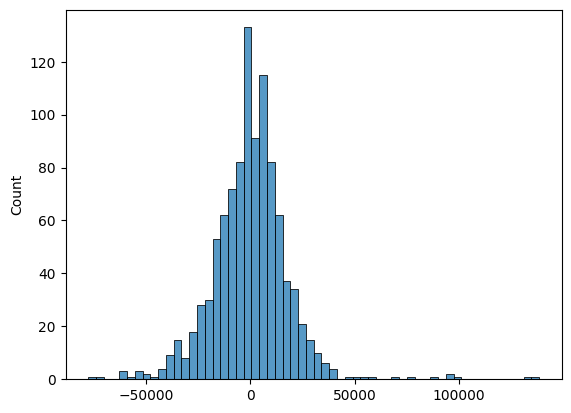

In [104]:
#Normality of errors
sns.histplot(model_building_resid);plt.show()

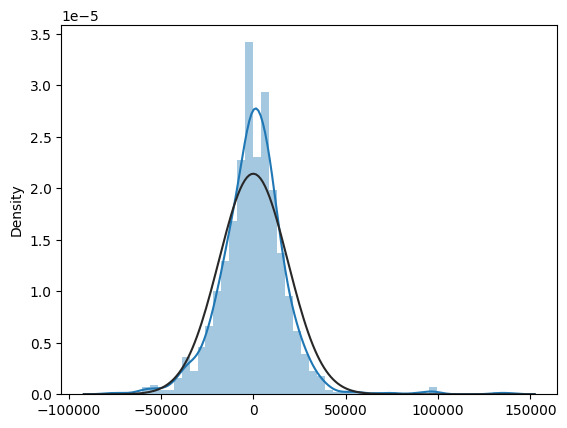

In [105]:
from scipy import stats
sns.distplot(model_building.resid, fit=stats.norm);plt.show()

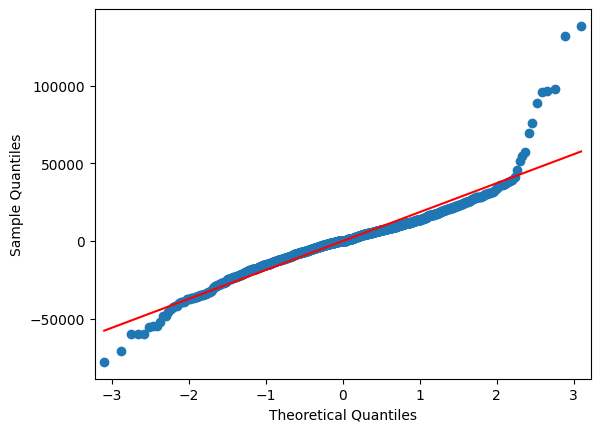

In [106]:
sm.qqplot(model_building.resid, line='s');

In [107]:
#Test of Homoscedasticity
def get_standardized_values(vals):
    return(vals-vals.mean())/vals.std()

Text(0, 0.5, 'Standardised Residuals')

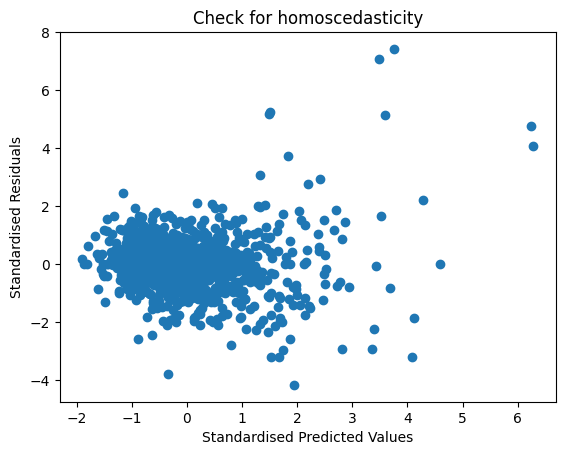

In [108]:
plt.scatter(get_standardized_values(model_building.fittedvalues),get_standardized_values(model_building.resid))

plt.title("Check for homoscedasticity")
plt.xlabel("Standardised Predicted Values")
plt.ylabel("Standardised Residuals")

# Breush Pagan Test check for Hetreroscedasticity

In [109]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sm


#perform Bresuch-Pagan test
names = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sm.het_breuschpagan(model_building.resid, model_building.model.exog)

lzip(names, test)

[('Lagrange multiplier statistic', 353.3488087275464),
 ('p-value', 4.363238919628264e-05),
 ('f-value', 1.7129196208077138),
 ('f p-value', 3.3069592737339335e-08)]

In [110]:
ages=[18,25,10,15]

names=["Sunny","Ekta","Sneha","Anand"]

lzip(ages,names)


[(18, 'Sunny'), (25, 'Ekta'), (10, 'Sneha'), (15, 'Anand')]

# Durbin Watson Test for checking autocorrelation between the residuals

In [111]:
from statsmodels.stats.stattools import durbin_watson

#A test statistic of 2 indicates no serial correlation.

#perform Durbin-Watson test


durbin_watson(model_building.resid)

1.9948584571868917

Text(0.5, 1.0, 'Cooks distance plot')

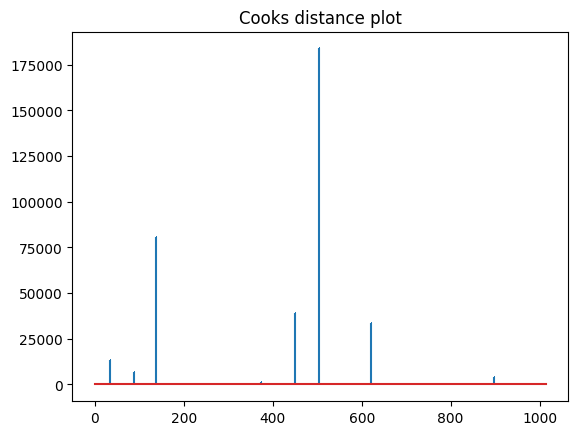

In [112]:
#Cooks distance
model_building_infl=model_building.get_influence()
(c,p)=model_building_infl.cooks_distance

plt.stem(np.arange(len(x_train)),np.round(c,3),markerfmt=",")

plt.title("Cooks distance plot")

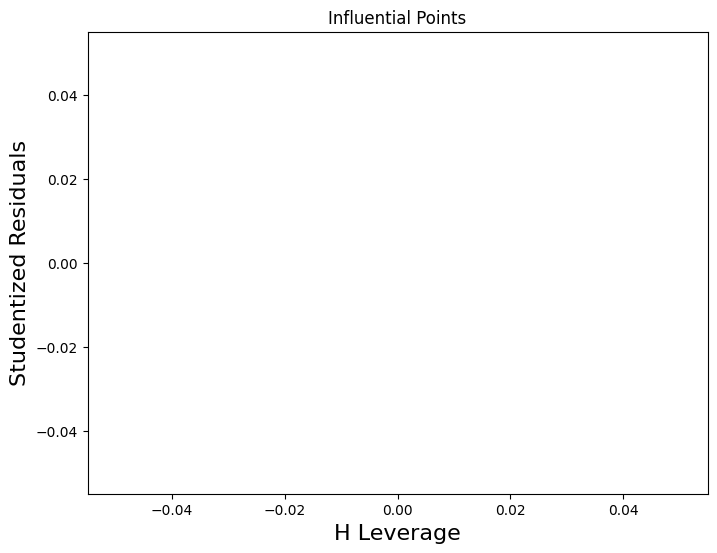

In [113]:
from statsmodels.graphics.regressionplots import influence_plot

fig,ax=plt.subplots(figsize=(8,6))
influence_plot(model_building,ax=ax)
plt.title("Influential Points")
plt.show()

In [114]:
#fig = sm.graphics.influence_plot(model_building, criterion="cooks")
#fig.tight_layout(pad=1.0)

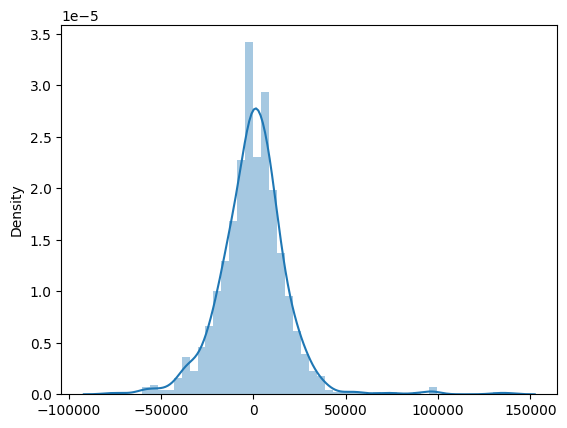

In [115]:
from scipy import stats
sns.distplot(model_building.resid);

In [116]:
pred_test = model_building.predict(x_test);pred_test

950     118362.033479
832     225601.442182
161     412837.227839
147     216461.437255
18      149423.887782
            ...      
1222    164273.784753
644     381438.699164
1094    123952.657630
752     212479.335045
1150    112134.004295
Length: 436, dtype: float64

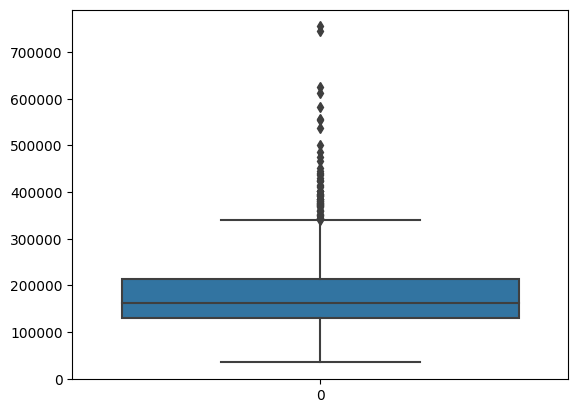

In [117]:
#Removal of outliers

sns.boxplot(train['Sale_Price']);plt.show()

In [118]:
train['Sale_Price'].describe()

count      1451.000000
mean     180637.885596
std       79308.105480
min       34900.000000
25%      129900.000000
50%      162900.000000
75%      214000.000000
max      755000.000000
Name: Sale_Price, dtype: float64

In [119]:
# Z score
from scipy import stats
import numpy as np
 
z = np.abs(stats.zscore(train['Sale_Price']))
print(z)

0       0.351436
1       0.010874
2       0.540637
3       0.512582
4       0.874892
          ...   
1454    0.055021
1455    0.071113
1456    0.370356
1457    1.083013
1458    0.485778
Name: Sale_Price, Length: 1451, dtype: float64


In [120]:
threshold = 3

# Position of the outlier
print(np.where(z > 3))

(array([  58,  178,  185,  348,  388,  439,  472,  495,  526,  589,  661,
        688,  766,  795,  800,  895, 1040, 1136, 1163, 1176, 1365],
      dtype=int64),)


In [121]:
new_df=train.drop([  58,  178,  185,  348,  388,  439,  472,  495,  526,  589,  661,
        688,  766,  795,  800,  895, 1040, 1136, 1163, 1176, 1365])

In [122]:
new_df.shape

(1430, 256)

In [123]:
train.shape

(1451, 256)